# <center>Visualisation de la Convergence du Schéma Numérique</center>

### Ordre de convergence

On reprend le schéma numérique implémenté pour la simulation du processus de Volterra pris en exemple dans le papier :

<center>$Z_t = \xi^0 + \int_0^t \frac{(t-s)^{H-1/2}}{\Gamma\left(H + \frac{1}{2}\right)} (\mu - \lambda Y_s) \, ds + \eta \int_0^t \frac{(t-s)^{H-1/2}}{\Gamma\left(H + \frac{1}{2}\right)} \sigma(Y_s) \, dB_s$<br>
$Z_t = \xi^0 + \int_0^t K_{1, H + \frac{1}{2}, 0}(t-s) b\left(s, (\tilde{K}_{1, H + \frac{1}{2}, 0} \ast Z)_s\right) \, ds + \eta \int_0^t K_{1, H + \frac{1}{2}, 0}(t-s) \sigma\left(s, (\tilde{K}_{1, H + \frac{1}{2}, 0} \ast Z)_s\right) \, dB_s$</center><br>

Et donc :<br>
<center>$\overline{Z}_{t_{k+1}}^N = \xi^0 + \frac{1}{\Gamma(H + \frac{1}{2})} \sum_{\ell=0}^{k} \left( b(t_\ell, \overline{\xi}_{t_\ell}) \frac{1}{H + \frac{1}{2}} \left(\frac{T}{N}\right)^{H + \frac{1}{2}} \left( (k - \ell + 1)^{H + \frac{1}{2}} - (k - \ell)^{H + \frac{1}{2}} \right) + \sigma(t_\ell, \overline{\xi}_{t_\ell}) \int_{t_\ell}^{t_{\ell+1}}  (t_{k+1} - s)^{H - \frac{1}{2}} \, dB_s \right)$</center>

Avec :
- $\sigma (t, y) = \sigma (y) = \sqrt{a(y - b)^{2} + c}$<br>
- $b(t, y) = b(y) = \mu - \lambda y$<br>
- $\lambda > 0$, $\eta > 0$, $\mu > 0$, $a > 0$, $b > 0$, $c > 0$<br>

Or, les fonctions $b$ et $\sigma$ satisfont la condition de Hölder-Lipschitz temps-espace $(4.3)$ du papier.<br>
En effet, $\forall \, (t, s) \in [0, T]^{2}, \forall \, (x, y) \in \mathbb{R}^2$ :<br>
* $|b(t, y) - b(s, x)| = |\mu - \lambda x - \mu + \lambda y| = \lambda |x - y|$
* $|\sigma (s, x) - \sigma (t, y)| = |\sqrt{a(x - b)^2 + c} - \sqrt{a(y - b)^2 + c}| = \sqrt{a}|\sqrt{(x - b)^2 + (\sqrt{\frac{c}{a}})^2} - \sqrt{(y - b)^2 + (\sqrt{\frac{c}{a}})^2}| = \sqrt{a} | \lVert (x - b, \sqrt{\frac{c}{a}})\rVert _2 - \lVert (y - b, \sqrt{\frac{c}{a}})\rVert _2|$
  Puis, par inégalité triangulaire de la norme euclidienne dans $\mathbb{R}^2$:<br>
  $|\sigma (s, x) - \sigma (t, y)| \leq \sqrt{a} \lVert (x - y, 0) \rVert _2 = \sqrt{a} \sqrt{(x - y)^2} = \sqrt{a} | x - y |$

Et donc :<br>
$|b(t, y) - b(s, x)| + |\sigma (s, x) - \sigma (t, y)| \leq (\sqrt{a} + \lambda)|x - y|$

A fortiori :<br>
$|b(t, y) - b(s, x)| + |\sigma (s, x) - \sigma (t, y)| \leq (\sqrt{a} + \lambda)((1 + |x| + |y|)|t - s|^{\gamma} + |x - y|)$

Avec $\gamma \in ]0, 1]$ arbitraire.

Toujours au sein de ce papier, trois cadres de simulation sont présentés. Ces trois cadres ont en commun la valeur des paramètres $a$, $b$ et $c$ :<br>
* $a = 0.384$
* $b = 0.095$
* $c = 0.0025$

Ensuite, les valeurs des paramètres $\xi ^0$, $\mu$, $\lambda$ et $\eta$ diffèrent selon le cadre :<br>
1. $\xi ^0 = 0$, $\mu = 2$, $\lambda = 1.2$, $\eta = 0.1$
2. $\xi ^0 = \frac{\mu}{\lambda}$, $\mu = 2$, $\lambda = 1.2$, $\eta = 0.1$
3. $\xi ^0 = \frac{\mu}{\lambda}$, $\mu = 2$, $\lambda = 20$, $\eta = 0.01$

Ainsi, nous pouvons remarquer que pour chacun des trois cadres proposés, les conditions du théorème $5.3$ sont respectées :
1. $\gamma \in ]0, 1]$ car arbitraire.
2. $\alpha \in ]\frac{1}{2}, 1[$ car $\alpha = H + \frac{1}{2}$ et $H = 0.1$.
3. On travaille avec la norme 2, donc $p = 2 > 0$.
4. Pour chaque ensemble de paramètres : $\min (\frac{1}{2}, \sqrt{a} + \lambda) = \frac{1}{2}$.

Donc l'ordre de convergence du schéma numérique du processus éléphant dans l'espace des processus stochastiques $\mathcal{L}^p$ est bien de $\frac{1}{2}$.

### Visualisation de la convergence

Bien entendu, l'erreur d'approximation d'un schéma numérique se calcule par rapport à la solution exacte. Malheureusement, nous ne disponsons pas de formule fermée pour calculer le processus éléphant $(Z_t)$. Il est donc nécessaire de trouver une solution alternative pour visualiser la convergence du schéma.

L'idée est la suivante : calculer la différence d'approximation numérique (i.e "l'erreur" **en norme 2**) entre les schémas $(X^{N}_{t_k})_{k \in {0, ..., N}}$ et $(X^{Const * N}_{Const * t_k})_{k \in {0, ..., N}}$ avec $Const$ une constante entière petite devant $N$ (nous prendrons $Const = 2$ pour l'exemple).

Nous savons qu'il existe des constantes $C$ et $C'$ telles que :

* $\underset{k \in \{0, ..., N\}}{\max} E[|Z_{t_k} - \overline{Z}_{t_k}^{N}|^2] \leq \frac{C}{N}$
* $\underset{k \in \{0, ..., N\}}{\max} E[|Z_{t_{2k}} - \overline{Z}_{t_{2k}}^{2N}|^2] \leq \frac{C'}{2N}$

Ainsi, intuitivement, on s'attend qu'au point de discrétisation $t_{k}$, la norme 2 entre $\overline{Z}_{t_{2k}}^{2N}$ et $\overline{Z}_{t_{k}}^{N}$ soit de l'ordre de l'erreur la plus élevée des deux schémas, soit $\sqrt{\frac{C''}{N}}$.

Mathématiquement :<br>
$\underset{k \in \{0, ..., N\}}{\max} E[|\overline{Z}_{t_k}^{N} - \overline{Z}_{t_{2k}}^{2N}|^2] \leq \frac{C''}{N}$

## Simulation

Pour visualiser cette convergence, nous allons simuler les trajectoires de l'EDS avec des pas de temps $\frac{T}{N}$ et $\frac{T}{2N}$, puis calculer l'erreur empirique entre ces deux approximations.

Il n'est pas correct de simuler les deux processus indépendamment : les mêmes sources d'aléatoires (i.e les mêmes browniens) guident les deux modèles.

### Première approche
L'approche consistant à simuler un mouvement brownien selon la discrétisation la plus fine (nécessaire pour la simulation du schéma au pas le plus petit), puis à grossir la discrétisation en prélevant des points de ce mouvement global (afin de simuler les schémas de pas plus élevés) a porté ses fruits lors de l'étude du schéma plus simple.

Je me suis donc laissé tête baissée dans l'implémentation d'une solution similaire : j'ai fait en sorte de simuler tous les vecteurs gaussiens centrés réduits d'un coup (nécessaires pour la simulation du schéma au pas le plus fin), puis j'ai récusivement construit la liste des vecteurs gaussiens centrés réduits nécessaires à la simulation des schémas aux pas plus grossiers en prélevant un vecteur sur deux (pour simuler une multiplication de la taille du pas par deux).

Malhaureusement, autant ce procédé avait une véritable justifiaction mathématique dans le cadre de l'exemple simple car je découpais directement le mouvement brownien simulé, autant ici cela n'a absolument aucun sens car je découpe simplement une suite de vecteurs gaussiens centrés réduits indépendants entre eux utilisés ensuite pour être multipliés à une matrice de covariance...

L'implémentation est laissée ici à titre de base de travail mais est parfaitement inutile.

In [1]:
# Importation des librairies utiles
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np


from scipy.special import gamma as gamma_function
from scipy.integrate import quad
# from scipy.stats import norm


from tqdm import tqdm


import time

In [2]:
# Thème par défaut Seaborn : Amélioration de la lisibilité
sns.set_theme()

In [3]:
# Variables globales
rng = np.random.default_rng()

In [4]:
def integrand(v, i, j, alpha):
    """
    Fonction intégrée utilisée pour calculer les coefficients de la matrice B.

    :param s: Float
        La variable d'intégration.

    :param i: Int
        L'indice de ligne pour le coefficient de matrice : 0 <= i <= N-1.

    :param j: Int
        L'indice de colonne pour le coefficient de matrice : 0 <= j <= N-1.

    :param alpha: Float
        Paramètre de forme influençant la dynamique du modèle.

    :return: Float
        Valeur de l'intégrale pour les paramètres donnés.
    """
    return np.power(i + v, alpha, dtype=np.float64) * np.power(j + v, alpha, dtype=np.float64)


def b_ij(i, j, alpha):
    """
    Calcule le coefficient (B_ij) de la matrice B.

    :param i: Int
        L'indice de ligne pour le coefficient de la matrice : 0 <= i <= N-1.

    :param j: Int
        L'indice de colonne pour le coefficient de la matrice : 0 <= j <= N-1.

    :param alpha: Float
        Paramètre de forme qui influence la partie fractionnaire du noyau de convolution.

    :return: Float
        Le coefficient B_ij de la matrice B.
    """
    if i == j:  # Forme fermée
        return (1 / (2*alpha + 1)) * (np.power(i + 1, 2*alpha + 1, dtype=np.float64) - np.power(i, 2*alpha + 1, dtype=np.float64))

    # elif i == 0:
        # return (j + 1)/(alpha + 1) - (alpha/(alpha + 1))*quad(integrand2, 0, 1, args=(j, alpha))[0]

    # elif j == 0:
        # return (i + 1)/(alpha + 1) - (alpha/(alpha + 1))*quad(integrand2, 0, 1, args=(i, alpha))[0]

    else:
        result, error = quad(integrand, 0, 1, args=(i, j, alpha))
        return result


def b_func(y, mu, lamb):
    """
    Calcule le terme de drift dans le modèle.

    :param y: Float
        La valeur actuelle du processus pour lequel le drift est calculé.

    :param mu: Float
        Le taux de rendement moyen attendu de l'actif.

    :param lamb: Float
        Taux de retour à la moyenne pour le processus.

    :return: Float
        La valeur du drift pour la valeur y du processus.
    """
    return mu - lamb*y
    

def deterministic_term(l, xi, k, mu, lamb, H, dt):
    """
    Permet de calculer le terme déterministe dans la somme pour simuler le processus éléphant au temps k+1.

    :param l: Int
        Indice de la somme.

    :param xi: Float
        La valeur du processus à l'indice l : 0 <= l <= k.

    :param k: Int
        Indice représentant la fin de l'intervalle temporel pour le calcul.

    :param mu: Float
        Le taux de rendement moyen attendu de l'actif.

    :param lamb: Float
        Taux de retour à la moyenne pour le processus.

    :param H: Float
        Paramètre de Hurst, influençant le degré de mémoire du processus.

    :param dt: Float
        dt = T/N, le pas de temps.

    :return: Float
        La contribution déterministe du terme pour les indices l et k.
    """
    return b_func(xi, mu, lamb)*(np.power(k - l + 1, H + 1/2) - np.power(k - l, H + 1/2))*np.power(dt, H + 1/2)*(1 / (H + 1/2))


def sigma(y, a, b, c):
    """
    Calcul le terme de dérive dans le modèle.

    :param y: Float
        La valeur actuelle du processus.

    :param a: Float
        Coefficient influençant la dépendance de la volatilité par rapport à l'écart entre y et b.

    :param b: Float
        Valeur autour de laquelle la volatilité est ajustée.

    :param c: Float
        Terme constant assurant que la volatilité ne tombe jamais en dessous d'un certain seuil.

    :return: Float
        La volatilité calculée pour la valeur y.
    """
    return np.sqrt(a*np.power(y-b, 2) + c)
    

def simulate_model(s0, eta, mu, lamb, a, b, c, H, T, xi0, N, size_sample, rho, liste_accroissements):
    """
    Simule les trajectoires d'un actif financier selon le modèle présenté dans l'article. 
    Ce modèle est particulier dans le sens où la volatilité de l'actif possède un effet de mémoire. 

    :param s0: Float
        Prix initial de l'actif financier.

    :param eta: Float
        Facteur d'échelle pour lisser la volatilité des processus "poisson rouge" et "éléphant".

    :param mu: Float
        Taux de rendement moyen attendu de l'actif.

    :param lamb: Float
        Taux de retour à la moyenne pour le modèle de "poisson rouge".

    :param a: Float
        Coefficient de l'échelle de la variance dans le modèle de l'actif.

    :param b: Float
        Point moyen autour duquel la variance fluctue.

    :param c: Float
        Terme constant ajouté à la variance. Seuil minimal / Variance "planchée"

    :param H: Float
        Paramètre de Hurst, contrôlant le degré de mémoire du processus "éléphant".

    :param T: Float
        Durée totale de la période de simulation, en années.

    :param xi0: Float
        Condition initiale pour le processus "éléphant".

    :param N: Int
        N+1 points de temps pour un pas de T/N.

    :param size_sample: Int
        Nombre de trajectoires indépendantes à simuler.

    :param rho: Float
        Taux de corrélation entre les mouvements browniens guidant les processus modélisant l'actif financier et la volatilité.

    :param liste_accroissements: List[List[np.array]]
        Liste des accroissements browniens utilisés pour générer les processus.
        Première dimension : Indice de la trajectoire à simuler
        Seconde dimension : Indice l de la colonne de la matrice G.
        Valeur : Matrice rng.standard_normal(size=(N-l+3, 1)), 1 <= l <= N

    :return: tuple of np.arrays
        Renvoie quatre matrices N+1 x size_sample pour Y, Z, V, et S représentant respectivement :
        - Y : le processus 'poisson rouge' markovien
        - Z : le processus 'éléphant' non-markovien
        - V : la variance du processus
        - S : le prix de l'actif financier simulé
    """
    dt = T/N

    # -------- Construction de la matrice G pour la simulation des processus --------
    # Calcul de la matrice [B_int]1<=i,j<=N
    B_int = np.zeros((N, N))
    
    # Remplissage de la moitié supérieure (diagonale incluse)
    with tqdm(range(N), desc="Calcul de la matrice B_int") as Nrange:
        for i in Nrange:
            for j in range(i, N):
                B_int[i, j] = b_ij(i, j, H - 1/2)
    
    B_int = B_int + B_int.T - np.diag(np.diag(B_int))

    # On s'assure que la matrice B_int est semi définie positive en gommant les erreur numériques
    B_int = B_int + (10e-9) * np.eye(N)

    print("Décomposition de Cholesky de la matrice B_int")
    # Decomposition de Cholesky de la matrice B_int
    try:
        L_B_int = np.linalg.cholesky(B_int)
    except np.linalg.LinAlgError as e:
        print("Erreur lors du calcul de la décomposition de Cholesky de la matrice B_int:", str(e))
        raise ValueError  # Ne devrait pas arriver, la matrice est semie définie positive...

    # Calcul du vecteur V
    t = np.arange(N)
    V = np.power(T/N, H + 1/2) * (1 / (H + 1/2)) * ((t + 1)**(H + 1/2) - t**(H + 1/2))

    # Calcul du vecteur U
    U = rho * V

    # Calcul de la matrice K
    K = np.array([[T/N, rho * T/N], 
                  [rho * T/N, T/N]])   

    # -------- Construction des N colonnes de G --------
    list_G = []  # Une matrice G par trajectoire
    with tqdm(range(size_sample), desc="Calcul des matrices G") as range_num_traj:
        for num_traj in range_num_traj:
            G_traj = np.zeros((N+2, N))
            for l in range(1, N+1):
                # Décomposition de Cholesky de la sous matrice B_l
                L_B_int_l = L_B_int[:N-l+1, :N-l+1]
                L_B_l = np.power(dt, H) * L_B_int_l
    
                # Sous vecteur V_l
                V_l = V[:N-l+1]
                V_l = V_l.reshape(N-l+1, 1)
    
                # Sous vecteur U_l
                U_l = U[:N-l+1]
                U_l = U_l.reshape(N-l+1, 1)
    
                # Sous matrice
                s_l = np.hstack((V_l, U_l))
    
                # Décomposition de Cholesky de la matrice de covariance globale Sigma_l
                delta_l = np.linalg.solve(L_B_l, s_l)
                # print(f"l = {l}\n{delta_l[:,0]}\n{delta_l[:,1]}\n")
    
                Temp = K - np.transpose(delta_l) @ delta_l
                # On s'assure que la matrice B_int est semi définie positive en gommant les erreur numériques
                Temp = Temp + (10e-9) * np.eye(2)
                try:
                    M = np.linalg.cholesky(Temp)
                except np.linalg.LinAlgError as e:
                    print("Erreur lors du calcul de la décomposition de Cholesky de la matrice K - (delta_l)^T * delta_l :", str(e))
                    raise ValueError  # Ne devrait pas arriver, la matrice est semie définie positive...
                    
                # Initialisation de la matrice L_l
                L_l = np.zeros((N-l+3, N-l+3))
                L_l[:N-l+1, :N-l+1] = L_B_l
                
                # Ajout de delta_l dans L_l
                delta_l_t = np.transpose(delta_l)
                L_l[N-l+1:N-l+3, :N-l+1] = delta_l_t
                
                # Ajout de M dans L_l
                L_l[N-l+1:N-l+3, N-l+1:N-l+3] = M
                # print(f"L_l =\n{L_l}\n")

                # Accroissements browniens
                w_acc = liste_accroissements[num_traj][l-1]
                
                # l-ième colonne de G simulée
                # print(f"N = {N}, l = {l}, w_acc.shape: {w_acc.shape}")
                G_traj[l-1:N+2, l-1] = (L_l @ w_acc)[:, 0]
    
            list_G.append(G_traj)
            # print(f"G_traj[N, :] = {G_traj[N, :]}")
            # print(f"G_traj[N+1, :] = {G_traj[N+1, :]}")
            
    # -------- Simulation des processus --------
    Y = np.zeros(shape=(N+1, size_sample))  # Le processus commence en 0, donc N browniens pour une trajectoire de N+1 points
    Z = np.zeros(shape=(N+1, size_sample))
    Z[0, :] = xi0
    V = np.zeros(shape=(N+1, size_sample))
    V[0, :] = a*(xi0 - b)**2 + c
    S = np.zeros(shape=(N+1, size_sample))
    S[0, :] = s0
    with tqdm(range(1, N+1), desc="Simulation des trajectoires") as Nrange:
        for n in Nrange:
            for num_traj in range(size_sample):
                G_traj = list_G[num_traj]

                # Simulation du processus markovien "poisson rouge"
                Y[n][num_traj] = Y[n-1][num_traj] + xi0*(1/gamma_function(3/2 - H))*(np.power(n*dt, 1/2 - H) - np.power((n-1)*dt, 1/2 - H)) + dt*b_func(Y[n-1][num_traj], mu, lamb) + eta*sigma(Y[n-1][num_traj], a, b, c)* G_traj[N, n-1]
                # print(f"G_traj[{N}, {n}-1] : {G_traj[N, n-1]}")
                
                # Simulation du processus "elephant"
                Z[n][num_traj] = xi0
        
                # Calcul de la somme
                l = np.arange(n)
    
                # Premier terme déterministe
                vectorized_deterministic_term = np.vectorize(lambda v1, v2: deterministic_term(v1, v2, n, mu, lamb, H, dt))
                xi = Y[:n, num_traj]
                s1 = vectorized_deterministic_term(l, xi)
    
                # Second terme stochastique
                s2 = eta * sigma(xi, a, b, c) * G_traj[n-1, :n]
                
                Z[n][num_traj] += np.sum(s1 +s2)*(1 / gamma_function(H + 1/2))
                # print(f"num_traj = {num_traj}\nn = {n}\nxi = {xi}\nG_traj[n-1, :n] = {G_traj[n-1, :n]}\n")

                # Simulation du processus de Variance
                V[n][num_traj] = a*np.power(Z[n][num_traj] - b, 2) + c
    
                # Simulation de l'actif financier
                S[n][num_traj] = S[n-1][num_traj] + S[n-1][num_traj]*np.sqrt(V[n-1][num_traj])*G_traj[N+1, n-1]
                # print(f"G_traj[{N+1}, {n}-1] : {G_traj[N+1, n-1]}")

    
    return Y, Z, V, S

In [5]:
def compute_errors_2N(s0, eta, mu, lamb, a, b, c, H, T, xi0, r_vals, size_sample, rho):
    errors = []

    # Génération des accroissements browniens pour la plus grande valeur de N
    N = 2**r_vals[-1]
    liste_accroissements_globaux = []
    
    for m in range(size_sample):
        accroissements_pour_cette_traj = []
        for l in range(1, N + 1):
            accroissements_pour_cette_traj.append(rng.standard_normal(size=(N - l + 3, 1)))
        liste_accroissements_globaux.append(accroissements_pour_cette_traj)

    # Initialisation de la liste des trajectoires
    liste_trajs = []
    liste_trajs.append(simulate_model(s0, eta, mu, lamb, a, b, c, H, T, xi0, N, size_sample, rho, liste_accroissements_globaux)[1])

    # Préparation de r_vals
    r_vals_copy = list(r_vals)
    r_vals_copy.pop()  # On enlève la plus grande valeur de r (car déjà utilisée)
    r_vals_copy.reverse()  # On commence par la plus grande valeur

    # Traitement des accroissements et génération des trajectoires pour les valeurs plus petites de N
    liste_accroissements = liste_accroissements_globaux
    
    for r in r_vals_copy:
        temp = []
        for accroissements_pour_cette_traj in liste_accroissements:
            new_accroissements_pour_cette_traj = []
            l = 1
            # print(f"N = {2**r}, len(accroissements_pour_cette_traj[::2]) = {len(accroissements_pour_cette_traj[::2])}")
            for accroissement in accroissements_pour_cette_traj[::2]:
                # print(f"Normalement on doit avoir len(accroissement) = {len(accroissement)} == {2**(r+1) -l +3}")
                l += 1
                new_accroissements_pour_cette_traj.append(np.concatenate((accroissement[:-2:2], accroissement[-2:])))  # Sauter un pas de temps sur deux
            # print(f"N = {2**r}, len(accroissements_pour_cette_traj) = {len(accroissements_pour_cette_traj)}, len(new_accroissements_pour_cette_traj) = {len(new_accroissements_pour_cette_traj)}")
            temp.append(new_accroissements_pour_cette_traj)
        
        liste_accroissements = temp
        N = 2**r

        # Petite verification des shape
        l = 1
        # for w_acc in liste_accroissements[0]:
            # print(f"N = {N}, l = {l}, w_acc.shape: {w_acc.shape}")
            # l += 1
            
        liste_trajs.append(simulate_model(s0, eta, mu, lamb, a, b, c, H, T, xi0, N, size_sample, rho, liste_accroissements)[1])

    print(f"len(liste_trajs) = {len(liste_trajs)}")
    for traj in liste_trajs:
        print(f"len(traj) = {len(traj)}")

    # Calcul des erreurs par paires de trajectoires
    errors = []
    for i in range(len(liste_trajs) - 1):
        print(len(np.max((liste_trajs[i][::2] - liste_trajs[i+1])**2, axis=0)))
        err = np.mean(np.max((liste_trajs[i][::2] - liste_trajs[i+1])**2, axis=0))
        errors.append(err)

    return errors

On se place dans les conditions de simulation du premier exemple du papier :

In [6]:
# Paramètres de la simulation
# Globaux
s0 = 1           # Prix initial de l'actif
T = 1            # Maturité / Temps d'arrêt de la simulation
size_sample = 100 # Nombre de trajectoires à générer

H = 0.1  # Paramètre de Hurst

# Paramètres de la fonction sigma
a = 0.384
b = 0.095
c = 0.0025

# Taux de corrélation des browniens
rho = -0.7

Calcul de la matrice B_int: 100%|██████████| 128/128 [00:00<00:00, 314.04it/s]


Décomposition de Cholesky de la matrice B_int


Calcul de la matrice B_int: 100%|██████████| 64/64 [00:00<00:00, 542.37it/s]


Décomposition de Cholesky de la matrice B_int


Calcul de la matrice B_int: 100%|██████████| 32/32 [00:00<00:00, 864.87it/s]


Décomposition de Cholesky de la matrice B_int


Calcul de la matrice B_int: 100%|██████████| 16/16 [00:00<00:00, 1142.86it/s]


Décomposition de Cholesky de la matrice B_int


Simulation des trajectoires: 100%|██████████| 16/16 [00:00<00:00, 128.00it/s]


len(liste_trajs) = 4
len(traj) = 129
len(traj) = 65
len(traj) = 33
len(traj) = 17
100
100
100
3
[0.03597540660809249, 0.03278686429594423, 0.029386771871497266]
4
[ 16  32  64 128]


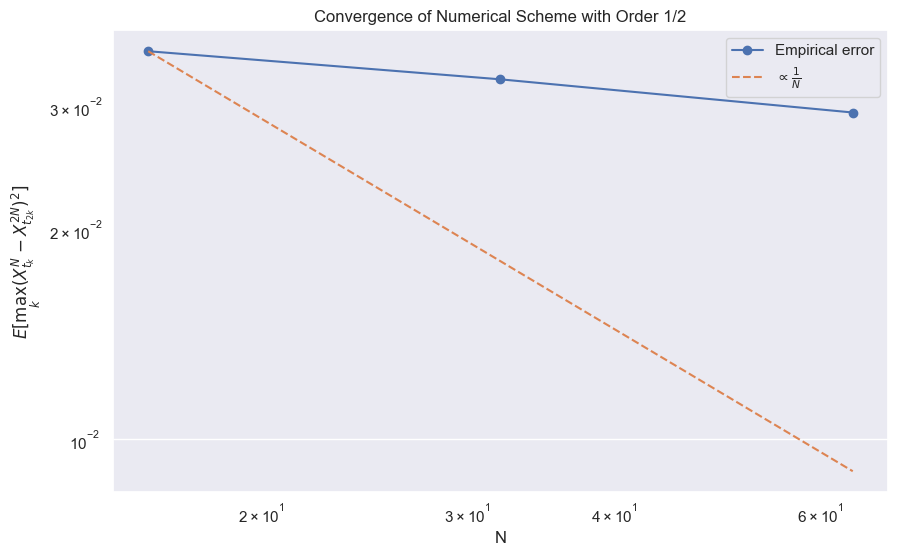

In [7]:
# Première simulation
eta = 0.1

# Paramètres de la fonction b
mu = 2
lamb = 1.2

# Processus markovien poisson rouge Y
xi0 = 0

# Calcul des erreurs
r_vals = [4, 5, 6, 7]
errors = compute_errors_2N(s0, eta, mu, lamb, a, b, c, H, T, xi0, r_vals, size_sample, rho)

Ns = 2**np.array(r_vals)

print(len(errors))
print(errors)
print(len(Ns))
print(Ns)

plt.figure(figsize=(10, 6))
plt.loglog(Ns[:-1], errors, '-o', label='Empirical error')
plt.loglog(Ns[:-1], [errors[0] * (Ns[0] / N) for N in Ns[:-1]], '--', label=r'$\propto \frac{1}{N}$')
plt.xlabel('N')
plt.ylabel(r'$E[\max_{k} (X^{N}_{t_k} - X^{2N}_{t_{2k}})^2]$')
plt.legend()
plt.title('Convergence of Numerical Scheme with Order 1/2')
plt.grid(True)
plt.show()

### Seconde approche

Une fois encore, il n'est pas possible de simuler les schémas aux différents pas de manière indépendante.

Il est donc nécessaire de construire une énorme matrice de covariance $G$ qui résumera l'ensemble des variables aléatoires à simuler dans le cadre de l'implémentation des schémas numériques aux différents pas.

Supposons que l'on souhaite simuler $m+1$ schémas avec les valeurs de $N$ suivantes : $2^{r} = 2^0 * r^r$, $2^{r + 1} = 2^1 * 2^r$, $2^{r + 2} = 2^2 * 2^r$, ..., $2^{r + m} = 2^m * 2^r$.<br>
Le schéma numéro $0$ aurait donc un pas de $\frac{T}{2^{r}}$ et  le schéma numéro $m$ aurait un pas de $\frac{T}{2^{r + m}}$.

Considérons la suite : $(I_k)_{0 \leq k \leq 2^{r + m}} = k \frac{T}{2^{r + m}}$.

Alors, au pas de temps $k \frac{T}{2^{r + m}}$, il sera nécessaire de simuler les schémas de pas :
- Si $k$ %  $2^{m} = 0$ : Tous les schémas.
- Sinon, si $k$ % $2^{m - 1} = 0$ :<br>
  Alors, $k \frac{T}{2^{r + m}} = c \frac{T}{2^{r + m - m + 1}} = c \frac{T}{2^{r + 1}}$, et donc il sera nécessaire de simuler les schémas de pas $\frac{T}{2^{r + 1}}$, $\frac{T}{2^{r + 1}}$, ..., $\frac{T}{2^{r + m}}$.
- ...
- Sinon, si $k$ % $2^{m - i} = 0$ :<br>
  Alors, $k \frac{T}{2^{r + m}} = c \frac{T}{2^{r + m - m + i}} = c \frac{T}{2^{r + i}}$, et donc il sera nécessaire de simuler les schémas de pas $\frac{T}{2^{r + i}}$, $\frac{T}{2^{r + i + 1}}$, ..., $\frac{T}{2^{r + m}}$.
- ...
- Sinon, si $k$ % $2^{1} = 0$ :<br>
  Alors, $k \frac{T}{2^{r + m}} = c \frac{T}{2^{r + m - 1}}$, et donc il sera nécessaire de simuler les schémas de pas $\frac{T}{2^{r + m - 1}}$ et $\frac{T}{2^{r + m}}$.
- Sinon : Uniquement le schéma de pas $\frac{T}{2^{r + m}}$

Ainsi, pour déterminer les schémas à simuler au temps $I_k$ il est nécessaire de respecter la procédure suivante :<br>
1. On détermine le plus grand $0 \leq i \leq m$ tel que $k$ % $2^i = 0$<br>
On obtient alors : $I_k = I_{c 2^i} = \frac{T}{2^{r + m - i}}$

2. Il est donc nécessaire de simuler $i + 1$ schémas, du pas le plus grossier $\frac{T}{2^{r + m - i}}$ au pas le plus fin $\frac{T}{2^{r + m}}$

Il est intéressant de remarquer dès maintenant que si l'on doit simuler le schéma de pas $\frac{T}{2^{r+m-i}}$ au temps $I_k$, alors $k$ % $2^i = 0$.

En effet, une condition nécessaire pour simuler le schéma de pas $\frac{T}{2^{r+m-i}}$ est qu'il existe $j \geq i$ tel que $2$ % $2^j = 0$, et donc, à fortiori, $2$ % $2^i = 0$.


**Les mathématiques derrière la simulation**

Pour la simulation des schémas : on prend l'ensemble des variables aléatoires à générer pour simuler l'ensemble des schémas aux différents pas de temps. Parmis ces variables aléatoires on sélectionne celles dont le début de l'intervalle de simulation est en $I_k$ et on les organise dans un vecteur.<br>

On s'intéresse ici uniquement au processus éléphant, on ne se complique pas la vie en ajoutant un brownien pour la simulation de l'actif financier.

En supposant que l'ensemble des schémas doivent être simulés au temps $I_k$ (i.e nous sommes dans le cas où $k$ % $2^m = 0$), on obtiendrait le vecteur à simuler (la concaténation de l'ensemble des vecteurs suivants) :<br>
<center>$V^k_m = [\int_{I_k}^{I_{k+1}} (I_{k+1} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+1}} (I_{k+2} - s)^{H - \frac{1}{2}} \, dB_s, ..., \int_{I_k}^{I_{k+1}} (I_{2^{r+m}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+1}} \, dB_s]$, de taille $2^m * 2^r - k + 1$<br>
$V^k_{m-1} = [\int_{I_k}^{I_{k+2}} (I_{k+2} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2}} (I_{k+4} - s)^{H - \frac{1}{2}} \, dB_s, ..., \int_{I_k}^{I_{k+2}} (I_{2^{r+m}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2}} \, dB_s]$, de taille $2^{m-1} * 2^r - k//2 + 1$<br>
    
<center>...</center><br>

$V^k_{m-i} = [\int_{I_k}^{I_{k+2^{i}}} (I_{k+2^{i}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2^{i}}} (I_{k+2^{i+1}} - s)^{H - \frac{1}{2}} \, dB_s, ..., \int_{I_k}^{I_{k+2^{i}}} (I_{2^{r+m}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2^{i}}} \, dB_s]$, de taille $2^{m-i} * 2^r - k//2^{i} + 1$<br>

<center>...</center><br>

$V^k_{0} = [\int_{I_k}^{I_{k+2^{m}}} (I_{k+2^{m}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2^{m}}} (I_{k+2^{m+1}} - s)^{H - \frac{1}{2}} \, dB_s, ..., \int_{I_k}^{I_{k+2^{m}}} (I_{2^{r+m}} - s)^{H - \frac{1}{2}} \, dB_s, \int_{I_k}^{I_{k+2^{m}}} \, dB_s]$, de taille $2^r - k//2^{m} + 1$
</center>

Où $V_{m-i}$ représente l'ensemble des variables aléatoires à simuler dont l'accroissement commence au temps $I_k$ pour le schéma de pas $\frac{1}{2^{r+m-i}}$.<br>

Au temps $I_k$, le terme général du vecteur $V_{m-i}^k = (V_{m-i}^{k, \ell})_{1 \leq \ell \leq 2^r * 2^{m-i} - k + 1}$ est donc donné par :<br>
Pour $1 \leq \ell \leq 2^r * 2^{m-i} - k//2^{i}$:<br>
<center>$\int_{I_k}^{I_{k+2^{i}}} (I_{k+ \ell 2^{i}} - s)^{H - \frac{1}{2}} \, dB_s$</center>

Pour $\ell = 2^r * 2^{m-i} - k//2^{i} + 1$:<br>
<center>$\int_{I_k}^{I_{k+2^{i}}} \, dB_s$</center>


**Récapitulatif des v.a à simuler**

On organise l'ensemble des variables aléatoires à simuler, pour tous les schémas et tous les pas de temps, dans une grande matrice G, dont les colonnes sont données par le vecteur $V^k$, formé de la concaténation de l'ensemble des vecteurs $V^k_{m-i}, 0 \leq i \leq m$.<br>
Les vecteurs $V_k$ sont de tailles différentes, il est donc nécessaire de compléter le début de ces vecteurs par des $0$ afin d'atteindre la taille du vecteur $V_0$.<br>
Ainsi formée, les lignes de la matrice G vont représenter les différentes variables aléatoires à simuler selon le point de temps et le pas de temps du schéma :<br>
La première ligne, constituée d'une unique variable, représente l'intégrale stochastique à simuler pour le schéma de pas de temps le plus fin au point $I_0$.<br>
La ligne numéro $2^{m+r} + 2$, constituée d'une unique variable, représente l'intégrale stochastique à simuler pour le schéma de pas de temps $\frac{T}{2^{r + m - 1}}$ entre les temps $I_0$ et $I_2$...


**Calcul de la matrice de covariance**

Comme dans l'implémentation d'un unique schéma, on simule colonne par colonne.<br>
Pour pouvoir calculer la matrice de covariance du vecteur $[V^k_m, ..., V^k_0]$, il est nécessaire de pouvoir calculer la covariance entre les variables aléatoires :<br>
<center>$\int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1 * 2^{i}} - s)^{H - \frac{1}{2}} \, dB_s$ et $\int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2 * 2^{j}} - s)^{H - \frac{1}{2}} \, dB_s$, $\quad \forall$ $0 \leq i,j \leq m, \quad \forall$ $1 \leq c_1 \leq 2^{r+m-i} - k//2^i, \quad \forall$ $1 \leq c_2 \leq 2^{r+m-j} - k//2^j$</center><br>

Il reste à justifier proprement le calcul de :<br>
<center>$\mathbb{E}[\int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1 * 2^{i}} - s)^{H - \frac{1}{2}} \, dB_s * \int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2 * 2^{j}} - s)^{H - \frac{1}{2}} \, dB_s]$</center>

Nous avons :<br>
<center>$\int_{I_k}^{I_{k+2^{i}}} (I_{k + c*2^{i}} - s)^{2H - 1} \, d<B>_s = \int_{I_k}^{I_{k+2^{i}}} (I_{k + c*2^{i}} - s)^{2H - 1} \, ds = - \frac{1}{2H} \left[ (I_{k + c*2^{i}} - s)^{2H} \right]_{I_k}^{I_{k+2^i}} < \infty$</center><br>
Et donc :
<center>$\mathbb{E} \left[ (\int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s)^2 \right] = \mathbb{E} \left[<\int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s> \right] = \int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{2H - 1} \, ds$</center><br>
<center>$\mathbb{E} \left[ (\int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, dB_s)^2 \right] = \mathbb{E} \left[<\int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, dB_s> \right] = \int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{2H - 1} \, ds$</center><br>
<center>$\mathbb{E} \left[ (\int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, dB_s + \int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s)^2 \right] = \mathbb{E} \left[<\int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, dB_s + \int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s> \right] = \int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{2H - 1} \, ds + \int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{2H - 1} \, ds + 2 \int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, ds$</center><br>
    
Enfin, par polarisation et identification :<br>
<center>$\mathbb{E} \left[\int_{I_k}^{I_{k+2^{i}}} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s * \int_{I_k}^{I_{k+2^{j}}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, dB_s \right] = \int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, ds$</center>

De même :<br>
<center>$\mathbb{E} \left[\int_{I_k}^{I_{k+2^{i}}} (I_{k + c*2^{i}} - s)^{H - \frac{1}{2}} \, dB_s * \int_{I_k}^{I_{k+2^{j}}} \, dB_s \right] = \int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} (I_{k + c*2^{i}} - s)^{H - \frac{1}{2}} \, ds$</center>

Et enfin :<br>
<center>$\mathbb{E} \left[\int_{I_k}^{I_{k+2^{i}}} \, dB_s * \int_{I_k}^{I_{k+2^{j}}} \, dB_s \right] = \int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} \, ds$</center>

<br>

**Astuces pour la simulation :**<br>
Il est intéressant de remarquer les propriétés suivantes des intégrales indiquant la covariances des variables aléatoires à simuler :<br>
On se place dans le cas $i < j$.

Cas noyau / noyau :
- $\int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} (I_{k + c_1*2^{i}} - s)^{H - \frac{1}{2}} (I_{k + c_2*2^{j}} - s)^{H - \frac{1}{2}} \, ds = (\frac{T}{2^{r+m}})^{2H} \int_0^{min(2^i, 2^j)} \left( 2^i \cdot c_1 - v \right)^{H - \frac{1}{2}} \cdot \left( 2^j \cdot c_2 - v \right)^{H - \frac{1}{2}} \, dv = (\frac{T}{2^{r+m-i}})^{2H} \int_0^1 \left(c_1 - v \right)^{H - \frac{1}{2}} \cdot \left( 2^{j-i} \cdot c_2 - v \right)^{H - \frac{1}{2}} \, dv = (\frac{T}{2^{r+m-i}})^{2H} \int_0^1 \left(c_1 + v - 1 \right)^{H - \frac{1}{2}} \cdot \left( 2^{j-i} \cdot c_2 + v - 1 \right)^{H - \frac{1}{2}} \, dv$

Cas noyau / simple :
- $\int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} (I_{k + c*2^{i}} - s)^{H - \frac{1}{2}} \, ds = (\frac{T}{2^{r+m}})^{H + \frac{1}{2}} \int_0^{min(2^i, 2^j)} \left( 2^i \cdot c - v \right)^{H - \frac{1}{2}} \, dv = (\frac{T}{2^{r+m-i}})^{H + \frac{1}{2}} \int_0^1 \left(c - v \right)^{H - \frac{1}{2}} \, dv = (\frac{T}{2^{r+m-i}})^{H + \frac{1}{2}} * \frac{1}{H + \frac{1}{2}} * \left[ c^{H + \frac{1}{2}} - (c-1)^{H + \frac{1}{2}} \right]$

Cas simple / simple :
- $\int_{I_k}^{min(I_{k+2^{i}}, I_{k+2^{j}})} \, ds = (\frac{T}{2^{r+m}}) \int_{0}^{min(2^{i}, 2^{j})} \, ds = \frac{T}{2^{r+m-i}}$

Nous pouvons observer que la valeur de ces intégrales est indépendante de $k$. Il n'est donc pas nécessaire de calculer la valeur de ces intégrales à chaque pas de temps : il est possible de la calculer une unique fois puis de la stocker en mémoire pour la réutiliser plus tard.

Pour la compréhension : les paramètres $i$ et $j$ servent à identifier les vecteurs $V_{m-i}$ et $V_{m-j}$ dont proviennent les intégrales dont on est en train d'effectuer les calculs de covariance. Les paramètres $c_1$ et $c_2$ permettent d'identifer l'indice de ces variables aléatoires dans ces mêmes vecteurs $V_{m-i}$ et $V_{m-j}$.


**La forme de la matrice de covariance du vecteur $[V^k_m, ..., V^k_{m-i}]$ :**<br>
Soit $0 \leq i \leq m$.<br>
Supposons que, au temps $I_k$, nous devons simuler les schémas de pas $\frac{1}{2^{r+m}}$, $\frac{1}{2^{r+m-1}}$, ..., $\frac{1}{2^{r+m-i}}$.<br>
Nous devrons alors simuler le vecteur $[V^k_m, ..., V^k_{m-i}]$. C'est un vecteur de taille $\sum_{j=0}^{i} \left( 2^{(m-i+j)} \cdot 2^r - \frac{k}{2^{i-j}} + 1 \right)$.

Pour calculer le terme général $(a_{p,q})$ de cette matrice de covariance $A$, il est nécessaire de considérer trois cas en fonction des indices $(p,q)$:<br>

Dans un premier temps, nous devons déterminer à quels vecteurs $V_{m-i}$ et $V_{m-j}$ fait référence le terme $a_{p,q}$, et à quelle variable précise dans ces vecteurs.

$\forall$ $0 \leq i \leq m,$ chaque vecteur $V_{m-i}^k$ admet une taille de $n_i = 2^{m-i} \cdot 2^r - \frac{k}{2^i} + 1$.<br>
Notons $(S_i)_{0 \leq i \leq m}$ la taille cumulative de ces vecteurs : $S_{i+1} = S_i + n_i$, $\quad S_0 = 0$.

Alors, $\forall$ $0 \leq p,q \leq S_m$:<br>
$\forall$ $0 \leq u \leq m-1$ :<br>

Si $S_{u} \leq p < S_{u+1}$:<br>
Alors $i = u$, $c_1 = p - S_u$ : On a identifié la variable numéro $c_1$ du vecteur $V_{m-i}$.<br>

Si $S_{u} \leq q < S_{u+1}$:<br>
Alors $j = u$, $c_2 = q - S_u$ : On a identifié la variable numéro $c_2$ du vecteur $V_{m-J}$.<br>

Maintenant que les vecteurs $V_{m-i}$ et $V_{m-j}$ ainsi que les indices internes $c_1$ et $c_2$ ont été identifiés, il reste à déterminer le type de calcul à effectuer (intégrale avec deux noyaux de convolution, un seul, pas du tout...).<br>
Les intégrales simples qui représentent simplement un accroissement brownien sont toujours les derniers éléments de chaque vecteur $V_{m-u}$. Ainsi :<br>
Si $c_1 = S_i - 1$, alors il s'agit d'une intégrale simple sans noyau de convolution.<br>
Si $c_2 = S_j - 1$, alors il s'agit d'une intégrale simple sans noyau de convolution.

**Une remarque importante sur la simulation :**

Malheureusement, il n'est plus possible de calculer une "super matrice" $B$ résumant les covariances de l'ensemble des vecteurs à simuler, d'effectuer une unique décomposition de Cholesky globale puis d'en extraire les sous matrices d'intérêt au temps $I_k$ comme on pouvait le faire lors de la simulation d'un unique schéma numérique (voir la fonction "simulate_model").

En effet, bien qu'il soit possible d'extraire la décomposition de Cholesky d'une sous matrice à partir de la décomposition d'une matrice principale, la décomposition de Cholesky est sensible aux permutations de lignes / colonnes. Il n'est donc malheureusement pas possible de trouver la décomposition de Cholesky d'une sous matrice formée de:
- une sous matrice du coin supérieur gauche d'une matrice principale A,
- plusieurs lignes non contigues à la précédente sous matrice de la matrice principale A,

uniquement à partir de la décoomposition de Cholesky L de A.

Cette remarque nous contraint à effectuer une nouvelle décomposition de Cholesky par pas de temps.<br>
(Il serait possible de s'amuser à implémenter un algorithme qui piocherait exactement les bons coefficients dans la décomposition de Cholesky de la matrice $[V^0_m, ..., V^0_{0}]$ mais le cauchemar derrière la gestion des indices sape tout l'intérêt de la chose pour un simple test)

Ci dessous une illustration rapide du phénomène :

In [8]:
# Construction d'une matrice symétrique définie positive A de taille 5x5
np.random.seed(0)
A = np.random.rand(5, 5)
A = A + A.T  # Symétrisation
A = A + 5 * np.eye(5)  # Ajout d'une matrice identité pour la rendre définie positive

print("Matrice A:\n", A)

# Décomposition de Cholesky L de A
L = np.linalg.cholesky(A)
print("\nMatrice de Cholesky L de A:\n", L)

# Extraction de la sous-matrice 2x2 du coin supérieur gauche de A
A_2x2 = A[:2, :2]
print("\nSous-matrice 2x2 du coin supérieur gauche de A:\n", A_2x2)

# Extraction de la quatrième ligne et colonne de A
A_col_4 = A[3, :4]
A_vec_3x1 = A_col_4[:-1].reshape(-1, 1)
print("\nVecteur 3x1 extrait de la 4e ligne et colonne de A (sans dernier élément):\n", A_vec_3x1)

# Construction de la nouvelle matrice B

B = np.zeros((3,3))
B[:2, :2] = A_2x2
B[2, :] = A_vec_3x1.T
B[:, 2] = A_vec_3x1.flatten()

print("\nMatrice B construite à partir de la sous-matrice 2x2 et du vecteur 3x1:\n", B)

# Décomposition de Cholesky de B
try:
    L_B = np.linalg.cholesky(B)
    print("\nMatrice de Cholesky L de B:\n", L_B)
except np.linalg.LinAlgError as e:
    print("\nErreur lors de la décomposition de Cholesky de B:", e)

# Extraction de la sous matrice correspondater dans la décomposition de Cholesky L de A
L_test = np.zeros((3,3))
L_test[:2, :2] = L[:2, :2]
L_test[2, :] = L[3, :4][:-1].reshape(-1, 1).T

print("\nMatrice L_test :\n", L_test)

Matrice A:
 [[6.09762701 1.36108348 1.39448841 0.63201248 1.40227314]
 [1.36108348 5.87517442 1.42066792 0.98388116 1.18260008]
 [1.39448841 1.42066792 6.13608912 1.75821648 0.53251542]
 [0.63201248 0.98388116 1.75821648 6.5563135  1.65054132]
 [1.40227314 1.18260008 0.53251542 1.65054132 5.23654885]]

Matrice de Cholesky L de A:
 [[2.46933736 0.         0.         0.         0.        ]
 [0.55119381 2.36037281 0.         0.         0.        ]
 [0.56472171 0.47000915 2.36564366 0.         0.        ]
 [0.25594416 0.35706492 0.61118904 2.44739835 0.        ]
 [0.56787427 0.36841269 0.0163453  0.55718756 2.11367325]]

Sous-matrice 2x2 du coin supérieur gauche de A:
 [[6.09762701 1.36108348]
 [1.36108348 5.87517442]]

Vecteur 3x1 extrait de la 4e ligne et colonne de A (sans dernier élément):
 [[0.63201248]
 [0.98388116]
 [1.75821648]]

Matrice B construite à partir de la sous-matrice 2x2 et du vecteur 3x1:
 [[6.09762701 1.36108348 0.63201248]
 [1.36108348 5.87517442 0.98388116]
 [0.63201

#### Vérification des calculs

On effectue quelques tests numériques dans le but de vérifier la cohérence des calculs.

In [9]:
def integ(v, i, j, alpha, c1, c2):
    """
    Fonction intégrée utilisée pour calculer les coefficients de la matrice B.

    :param s: Float
        La variable d'intégration.

    :param alpha: Float
        Paramètre de forme influençant la dynamique du modèle.

    :return: Float
        Valeur de l'intégrale pour les paramètres donnés.
    """
    return np.power(c1 - v, alpha, dtype=np.float64) * np.power(c2*np.power(2, j-i, dtype=np.float64) - v, alpha, dtype=np.float64)


def integ2(v, i, j, alpha, c1, c2, k, dt):
    return np.power(dt*(k + c1*(2**i)) - v, alpha, dtype=np.float64) * np.power(dt*(k + c2*(2**j)) - v, alpha, dtype=np.float64)


def integ3(v, i, j, alpha, li, lj):
    """
    Fonction intégrée utilisée pour calculer les coefficients de la matrice B.

    :return: Float
        Valeur de l'intégrale pour les paramètres donnés.
    """
    return np.power(li - 1 + v, alpha, dtype=np.float64) * np.power(l_j*np.power(2, j-i, dtype=np.float64) + v - 1, alpha, dtype=np.float64)

In [10]:
# Tests pour vérifier que la forme finale de l'intégrale est bien indépendante de k
k = 1024  # Indice où on doit simuler les schémas de pas T/2**(r+m-i) et  T/2**(r+m-j)

r = 2
m = 10

T = 1

dt = T/2**(r+m)

i = 4  # 0 <= i <= m
j = 5  # O <= j <= m

l_i = 6  # 1 <= 2**(r+m-i) - k//2**i
l_j = 3  # 1 <= 2**(r+m-j) - k//2**j


assert (k >= 0) and (k <= 2**(r+m))
assert k%(2**i) == 0
assert k%(2**j) == 0
assert (l_i >= 1) and (l_i <= 2**(r+m-i) - k//(2**i))
assert (l_j >= 1) and (l_j <= 2**(r+m-j) - k//(2**j))


if i <= j:
    cov = quad(integ2, k*dt, dt*(k + 2**i), args=(i, j, H - 1/2, l_i, l_j, k, dt))[0]
else:
    cov = quad(integ2, k*dt, dt*(k + 2**j), args=(j, i, H - 1/2, l_j, l_i, k, dt))[0]

print(cov)

0.08451352445465464


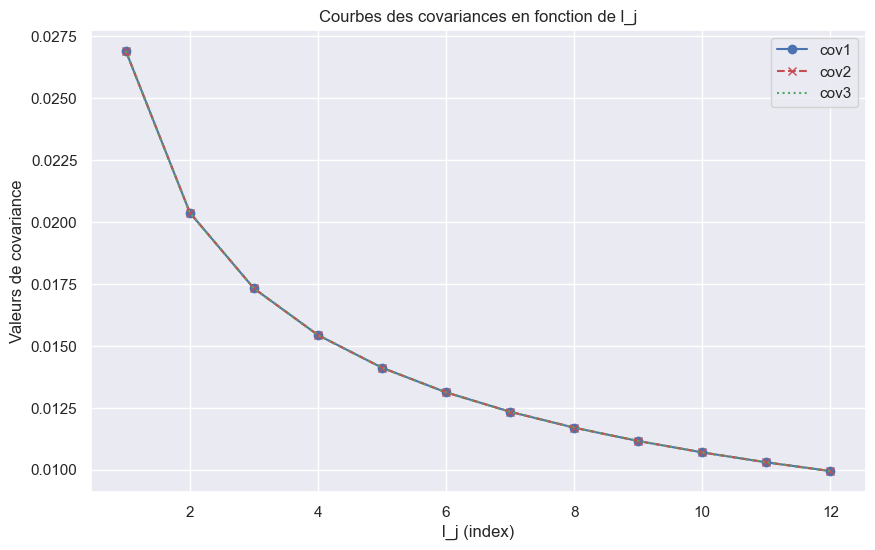

In [11]:
# Tests pour vérifier les formes simplifiées de l'intégrale
# On fixe tous les paramètres sauf l_j et on trace
k = 1024  # Indice où on doit simuler les schémas de pas T/2**(r+m-i) et  T/2**(r+m-j)

r = 2
m = 10

T = 1

dt = T/2**(r+m)

i = 1  # 0 <= i <= m
j = 8  # O <= j <= m

l_i = 2  # 1 <= 2**(r+m-i) - k//2**i


assert (k >= 0) and (k <= 2**(r+m))
assert k%(2**i) == 0
assert k%(2**j) == 0
assert (l_i >= 1) and (l_i <= 2**(r+m-i) - k//(2**i))

js = []
cov1 = []
cov2 = []
cov3 = []
for l_j in range(1, 2**(r+m-j) - k//(2**j) + 1):
    js.append(l_j)
    
    if i <= j:
        cov1.append(((dt * 2**i)**(2*H))*quad(integ, 0, 1, args=(i, j, H - 1/2, l_i, l_j))[0])
        cov3.append(((dt * 2**i)**(2*H))*quad(integ3, 0, 1, args=(i, j, H - 1/2, l_i, l_j))[0])
        cov2.append(quad(integ2, k*dt, dt*(k + 2**i), args=(i, j, H - 1/2, l_i, l_j, k, dt))[0])
    else:
        cov1.append(((dt * 2**j)**(2*H))*quad(integ, 0, 1, args=(j, i, H - 1/2, l_j, l_i))[0])
        cov3.append(((dt * 2**j)**(2*H))*quad(integ3, 0, 1, args=(j, i, H - 1/2, l_j, l_i))[0])
        cov2.append(quad(integ2, k*dt, dt*(k + 2**j), args=(j, i, H - 1/2, l_j, l_i, k, dt))[0])

# Tracé des courbes avec matplotlib
plt.figure(figsize=(10, 6))
plt.plot(js, cov1, label='cov1', color='b', marker='o')
plt.plot(js, cov2, label='cov2', color='r', linestyle='--', marker='x')
plt.plot(js, cov3, label='cov3', color='g', linestyle=':')

# Ajouter des labels et un titre
plt.xlabel('l_j (index)')
plt.ylabel('Valeurs de covariance')
plt.title('Courbes des covariances en fonction de l_j')

# Afficher la légende et le graphique
plt.legend()
plt.grid(True)
plt.show()

#### On cherche quelle forme de l'intégrale nous donne la matrice A la mieux conditionnée

In [12]:
def a_pq(p, q, cumulative_sizes, H, r, m):
    """
    Permet de calculer le terme a_pq de la matrice de covariance A.

    :param p: Int
        Indice de la ligne de la matrice où se situe le coefficient à calculer.

    :param q: Int
        Indice de la colonne de la matrice où se situe le coefficient à calculer.

    :param cumulative_sizes: List[Int]
        Tailles cumulatives des vecteurs V_{m-i} [S_0, S_1, ..., S_{m}].

    :param H: Float
        Paramètre de Hurst.

    :param r:
        Exposant minimal pour le calcul du pas de temps.

    :param m: Int
        Coefficient d'exposant maximum dans le calcul des pas de temps.

    :return: Float
        Covariance entre les variables adaptées au terme (p,q) de la matrice de covariance.
    """
    # Map indices to levels and internal indices
    i_p, c_p, is_kernel_p = map_index(p, cumulative_sizes, m)
    i_q, c_q, is_kernel_q = map_index(q, cumulative_sizes, m)

    # Pas de temps le plus fin
    dt = (T / (2 ** (r + m))) * min(2 ** i_p, 2 ** i_q)

    # Initialisation de la covariance
    covariance = 0.0

    # Calcul de la covariance en fonction des cas
    if is_kernel_p and is_kernel_q:
        if (i_p == i_q) and (c_p == c_q):  # Formule fermée
            covariance = (1/(2*H))*(dt**(2*H))*(c_p**(2*H) - (c_p - 1)**(2*H))
        elif i_p <= i_q:
            covariance = (dt**(2*H))*quad(integ, 0, 1, args=(i_p, i_q, H - 1/2, c_p, c_q))[0]
        else:
            covariance = (dt**(2*H))*quad(integ, 0, 1, args=(i_q, i_p, H - 1/2, c_q, c_p))[0]
        
    elif is_kernel_p and (not is_kernel_q):
        if i_p <= i_q:  # Condition inutile, juste à des fins de controle
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))
        else:
            print("NE DEVRAIT PAS ARRIVER PAR SYMETRIE")
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))            
        
    elif (not is_kernel_p) and is_kernel_q:
        if i_p <= i_q:  # Condition inutile, juste à des fins de controle
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))
        else:
            print("Ne devrait pas arriver par symetrie")
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))
        
    else:
        # Les deux variables sont des incréments browniens
        covariance = dt

    """
    print(f"p={p}, q={q}, cumulative_sizes={cumulative_sizes}, H={H}, r={r}, m={m}")
    print(f"i_p={i_p}, c_p={c_p}, is_kernel_p={is_kernel_p}")
    print(f"i_q={i_q}, c_q={c_q}, is_kernel_q={is_kernel_q}")
    print(f"covariance = {covariance}\n")
    print(f"i_p <= i_q : {i_p <= i_q}")
    """

    return covariance


def a_pq2(p, q, cumulative_sizes, H, r, m, k):
    """
    Permet de calculer le terme a_pq de la matrice de covariance A.

    :param p: Int
        Indice de la ligne de la matrice où se situe le coefficient à calculer.

    :param q: Int
        Indice de la colonne de la matrice où se situe le coefficient à calculer.

    :param cumulative_sizes: List[Int]
        Tailles cumulatives des vecteurs V_{m-i} [S_0, S_1, ..., S_{m}].

    :param H: Float
        Paramètre de Hurst.

    :param r:
        Exposant minimal pour le calcul du pas de temps.

    :param m: Int
        Coefficient d'exposant maximum dans le calcul des pas de temps.

    :return: Float
        Covariance entre les variables adaptées au terme (p,q) de la matrice de covariance.
    """
    # Map indices to levels and internal indices
    i_p, c_p, is_kernel_p = map_index(p, cumulative_sizes, m)
    i_q, c_q, is_kernel_q = map_index(q, cumulative_sizes, m)

    # Pas de temps le plus fin
    dt = (T / (2 ** (r + m)))

    # Initialisation de la covariance
    covariance = 0.0

    # Calcul de la covariance en fonction des cas
    if is_kernel_p and is_kernel_q:
        if i_p < i_q:
            covariance = quad(integ2, k*dt, dt*(k + 2**i_p), args=(i_p, i_q, H - 1/2, c_p, c_q, k, dt))[0]
        else:
            covariance = quad(integ2, k*dt, dt*(k + 2**i_q), args=(i_q, i_p, H - 1/2, c_q, c_p, k, dt))[0]
        
    elif is_kernel_p and not is_kernel_q:
        if i_p < i_q:
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))
        else:
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))            
        
    elif not is_kernel_p and is_kernel_q:
        if i_p < i_q:
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))
        else:
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))
        
    else:
        # Les deux variables sont des incréments browniens
        covariance = dt

    """
    print(f"p={p}, q={q}, cumulative_sizes={cumulative_sizes}, H={H}, r={r}, m={m}")
    print(f"i_p={i_p}, c_p={c_p}, is_kernel_p={is_kernel_p}")
    print(f"i_q={i_q}, c_q={c_q}, is_kernel_q={is_kernel_q}")
    print(f"covariance = {covariance}\n")
    """

    return covariance


def a_pq3(p, q, cumulative_sizes, H, r, m):
    """
    Permet de calculer le terme a_pq de la matrice de covariance A.

    :param p: Int
        Indice de la ligne de la matrice où se situe le coefficient à calculer.

    :param q: Int
        Indice de la colonne de la matrice où se situe le coefficient à calculer.

    :param cumulative_sizes: List[Int]
        Tailles cumulatives des vecteurs V_{m-i} [S_0, S_1, ..., S_{m}].

    :param H: Float
        Paramètre de Hurst.

    :param r:
        Exposant minimal pour le calcul du pas de temps.

    :param m: Int
        Coefficient d'exposant maximum dans le calcul des pas de temps.

    :return: Float
        Covariance entre les variables adaptées au terme (p,q) de la matrice de covariance.
    """
    # Paramètres de précision pour quad
    epsabs = 1e-12  # Précision absolue souhaitée
    epsrel = 1e-12  # Précision relative souhaitée
    limit = 1000    # Nombre maximal de subdivisions (augmente la capacité de quad à affiner l'intégration)

    # Map indices to levels and internal indices
    i_p, c_p, is_kernel_p = map_index(p, cumulative_sizes, m)
    i_q, c_q, is_kernel_q = map_index(q, cumulative_sizes, m)

    # Pas de temps le plus fin
    dt = (T / (2 ** (r + m))) * min(2 ** i_p, 2 ** i_q)

    # Initialisation de la covariance
    covariance = 0.0

    # Calcul de la covariance en fonction des cas
    if is_kernel_p and is_kernel_q:
        if (i_p == i_q) and (c_p == c_q):  # Formule fermée
            covariance = (1/(2*H))*(dt**(2*H))*(c_p**(2*H) - (c_p - 1)**(2*H))
        elif i_p <= i_q:
            covariance = (dt**(2*H))*quad(integ3, 0, 1, args=(i_p, i_q, H - 1/2, c_p, c_q), epsabs=epsabs, epsrel=epsrel, limit=limit)[0]
        else:
            covariance = (dt**(2*H))*quad(integ3, 0, 1, args=(i_q, i_p, H - 1/2, c_q, c_p), epsabs=epsabs, epsrel=epsrel, limit=limit)[0]
        
    elif is_kernel_p and (not is_kernel_q):
        if i_p <= i_q:  # Condition inutile, juste à des fins de controle
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))
        else:
            print("NE DEVRAIT PAS ARRIVER PAR SYMETRIE")
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_p**(H + 1/2) - (c_p - 1)**(H + 1/2))            
        
    elif (not is_kernel_p) and is_kernel_q:
        if i_p <= i_q:  # Condition inutile, juste à des fins de controle
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))
        else:
            print("Ne devrait pas arriver par symetrie")
            covariance = (dt**(H + 1/2))*(1/(H + 1/2))*(c_q**(H + 1/2) - (c_q - 1)**(H + 1/2))
        
    else:
        # Les deux variables sont des incréments browniens
        covariance = dt

    """
    print(f"p={p}, q={q}, cumulative_sizes={cumulative_sizes}, H={H}, r={r}, m={m}")
    print(f"i_p={i_p}, c_p={c_p}, is_kernel_p={is_kernel_p}")
    print(f"i_q={i_q}, c_q={c_q}, is_kernel_q={is_kernel_q}")
    print(f"covariance = {covariance}\n")
    print(f"i_p <= i_q : {i_p <= i_q}")
    """

    return covariance

In [13]:
def map_index(p, cumulative_sizes, m):
    """
    :param p: Int
        Indice de la variable dans le vecteur V.

    :param cumulative_sizes: List[Int]
        Tailles cumulatives des vecteurs V_{m-i} [S_0, S_1, ..., S_{m}].

    :param m: Int
        Coefficient d'exposant maximum dans le calcul des pas de temps.

    :return: Tuple(Int, Int, Bool)
        - Indice V_{m-i} dans le vecteur concaténé V.
        - Coefficient de position c1
        - Si oui ou non il s'agit d'une intégrale sans noyau de convolution (simple incrément brownien)
    """
    for idx in range(len(cumulative_sizes) - 1):
        if cumulative_sizes[idx] <= p < cumulative_sizes[idx + 1]:
            i = idx
            c = p - cumulative_sizes[idx] + 1
            if p == cumulative_sizes[idx + 1] - 1:  # Intégrale pour juste un accroissement brownien, sans noyau
                return i, c, False
            return i, c, True
    raise ValueError(f"Index p={p} is out of bounds.")

In [14]:
liste_A_integ1 = []
liste_A_integ2 = []
liste_A_integ3 = []

r = 2
m = 3

# Grille temporelle selon le pas de temps le plus fin
N = 2 ** (r + m)
dt = T / N
    
# Pour chaque pas de temps dans la grille la plus fine
for k in range(N):
    print(f"-------------------------- k = {k} --------------------------")
    # On détermine les schémas qu'il est nécessaire de simuler au temps I_k
    schemes_to_simulate = []
    max_i = 0
    for i in range(m, -1, -1):  # i varie de m à 0
        if k % 2**i == 0:
            max_i = i
            break
    for i in range(i+1):
        schemes_to_simulate.append(i)
    print(f"schemes_to_simulate = {schemes_to_simulate}")

    # Construction des tailles cumulatives pour pouvoir s'y retrouver dans la gestion d'indices
    cumulative_sizes = [0]
    for i in schemes_to_simulate:
        cumulative_sizes.append( 2**(m + r - i) + 1 - k//(2**i) + cumulative_sizes[-1])
    print(f"cumulative_sizes = {cumulative_sizes}")

    A1 = np.zeros((cumulative_sizes[-1], cumulative_sizes[-1]))
    A2 = np.zeros((cumulative_sizes[-1], cumulative_sizes[-1]))
    A3 = np.zeros((cumulative_sizes[-1], cumulative_sizes[-1]))

    # Calcul de la matrice de covariance A
    for p in range(cumulative_sizes[-1]):
        for q in range(p, cumulative_sizes[-1]):
            try:
                cov1_pq = a_pq(p, q, cumulative_sizes, H, r, m)
                cov2_pq = a_pq2(p, q, cumulative_sizes, H, r, m, k)
                cov3_pq = a_pq3(p, q, cumulative_sizes, H, r, m)
            except Exception as e:
                print(e)
                # print(f"num_vars = {num_vars}, cumulative_sizes = {cumulative_sizes}\n")
                
            A1[p, q] = cov1_pq  # Remplissage matrice triangulaire supérieure : i_p <= i_q
            A1[q, p] = cov1_pq  # Remplissage matrice triangulaire inférieure
            
            A2[p, q] = cov2_pq  # Remplissage matrice triangulaire supérieure : i_p <= i_q
            A2[q, p] = cov2_pq  # Remplissage matrice triangulaire inférieure
            
            A3[p, q] = cov3_pq  # Remplissage matrice triangulaire supérieure : i_p <= i_q
            A3[q, p] = cov3_pq  # Remplissage matrice triangulaire inférieure

    liste_A_integ1.append(A1)
    liste_A_integ2.append(A2)
    liste_A_integ3.append(A3)

# On affiche les conditionnements
for k in range(len(liste_A_integ1)):
    print(f"k = {k}")
    print(f"Conditionnement A1 = {np.linalg.cond(liste_A_integ1[k])}")
    print(f"Plus petite valeur propre de A1 :{np.min(np.linalg.eigh(liste_A_integ1[k])[0])}")
    print(f"Conditionnement A2 = {np.linalg.cond(liste_A_integ2[k])}")
    print(f"Plus petite valeur propre de A2 :{np.min(np.linalg.eigh(liste_A_integ2[k])[0])}")
    print(f"Conditionnement A3 = {np.linalg.cond(liste_A_integ3[k])}")
    print(f"Plus petite valeur propre de A3 :{np.min(np.linalg.eigh(liste_A_integ3[k])[0])}")
    print(f"Norme A1 - A2 = {np.linalg.norm(liste_A_integ1[k] - liste_A_integ2[k], ord='fro')}")
    print(f"Norme A1 - A3 = {np.linalg.norm(liste_A_integ1[k] - liste_A_integ3[k], ord='fro')}\n")

-------------------------- k = 0 --------------------------
schemes_to_simulate = [0, 1, 2, 3]
cumulative_sizes = [0, 33, 50, 59, 64]
-------------------------- k = 1 --------------------------
schemes_to_simulate = [0]
cumulative_sizes = [0, 32]
-------------------------- k = 2 --------------------------
schemes_to_simulate = [0, 1]
cumulative_sizes = [0, 31, 47]
-------------------------- k = 3 --------------------------
schemes_to_simulate = [0]
cumulative_sizes = [0, 30]
-------------------------- k = 4 --------------------------
schemes_to_simulate = [0, 1, 2]
cumulative_sizes = [0, 29, 44, 52]
-------------------------- k = 5 --------------------------
schemes_to_simulate = [0]
cumulative_sizes = [0, 28]
-------------------------- k = 6 --------------------------
schemes_to_simulate = [0, 1]
cumulative_sizes = [0, 27, 41]
-------------------------- k = 7 --------------------------
schemes_to_simulate = [0]
cumulative_sizes = [0, 26]
-------------------------- k = 8 --------------

**On remarque deux choses intéressantes :**
1. La forme de l'intégrale donnant les matrices les mieux conditionnées est la forme numéro 3, mais c'est également celle qui se comporte le moins bien vis à vis des valeurs propres (ce qui est cohérent d'un point de vue mathématiques)
   
3. La forme de l'intégrale donnant les valeurs propres les plus proches de 0 est la forme numéro 1.

Cette remarque est extrêmement importante car il est véritablement infernal de travailler numériquement avec des matrices mal conditionnées (la décomposition de Cholesky est alors impossible à réaliser proprement sans implémenter une forme de contrôle empirique et subjective : ex :limitation des coefficients, etc)

#### Décomposition de Cholesky

Remarque : Dans cette nouvelle approche, j'ai été confronté à plus de problèmes d'approximations numériques que précédemment. Je dois donc passer par la décomposition de Cholesky alternative / "square free" pour traiter les problèmes de valeurs propres négatives.

In [15]:
def cholesky_square_free(A, max_allowed=10):
    """
    Cette fonction permet d'effectuer la décomposition de Cholesky sans racine carrée
    de la matrice A.

    :param A: np.array
        Matrice carrée A dont on souhaite calculer la décomposition de Cholesky alternative.

    :return: Tuple[np.array, np.array]
        - L : La matrice triangulaire inférieure avec des 1 sur sa diagonale.
        - D : La matrice diagonale.
    """
    n = A.shape[0]
    L = np.eye(n)  # Initialisation de L avec des 1 sur la diagonale
    D = np.zeros(n)

    for i in range(n):
        # Calcul de D[i]
        D[i] = A[i, i] - np.sum([L[i, k]**2 * D[k] for k in range(i)])

        # Correction des erreurs numériques
        # D[i] peut parfois être de l'ordre de -1e-15 pour la matrice A^k d'intérêt
        if D[i] <= 0:
            D[i] = 10e-9

        # if (D[i] < -1e-10) or (D[i] > 10e3):
            # print(f"i = {i}, D[i] = {D[i]}")  # Valeur étonnante. Permet de surveiller les éventuelles erreurs de calcul
        
        for j in range(i+1, n):
            L[j, i] = (A[j, i] - np.sum([L[j, k] * L[i, k] * D[k] for k in range(i)])) / D[i]

            if np.abs(L[j, i]) > max_allowed:
                # print(f"Valeur aberrante détectée à L[{j}, {i}] = {L[j, i]}. Correction en cours.")
                L[j, i] = np.sign(L[j, i]) * max_allowed  # Limiter la valeur


    return L, np.diag(D)

In [16]:
A = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])

print(f"A = \n{A}\n")

L, D = cholesky_square_free(A)

print("L = ")
print(L)
print("\n")
print("D = ")
print(D)

A = 
[[  4  12 -16]
 [ 12  37 -43]
 [-16 -43  98]]

L = 
[[ 1.  0.  0.]
 [ 3.  1.  0.]
 [-4.  5.  1.]]


D = 
[[4. 0. 0.]
 [0. 1. 0.]
 [0. 0. 9.]]


#### Implémentation des schémas numériques

In [28]:
def simulate_models_2N(eta, mu, lamb, a, b, c, H, T, xi0, r, m, size_sample):
    """
    Simule les trajectoires d'un actif financier selon le modèle présenté dans l'article. 
    Ce modèle est particulier dans le sens où la volatilité de l'actif possède un effet de mémoire. 

    :param eta: Float
        Facteur d'échelle pour lisser la volatilité des processus "poisson rouge" et "éléphant".

    :param mu: Float
        Taux de rendement moyen attendu de l'actif.

    :param lamb: Float
        Taux de retour à la moyenne pour le modèle de "poisson rouge".

    :param a: Float
        Coefficient de l'échelle de la variance dans le modèle de l'actif.

    :param b: Float
        Point moyen autour duquel la variance fluctue.

    :param c: Float
        Terme constant ajouté à la variance. Seuil minimal / Variance "planchée"

    :param H: Float
        Paramètre de Hurst, contrôlant le degré de mémoire du processus "éléphant".

    :param T: Float
        Durée totale de la période de simulation, en années.

    :param xi0: Float
        Condition initiale pour le processus "éléphant".

    :param r: Int
        Exposant de base pour le pas de temps : N_min=2^r.    
    
    :param m: Int
        Nombre d'exposants additionnels : N_max=2^{r+m}.

    :param size_sample: Int
        Nombre de trajectoires indépendantes à simuler.

    :return: tuple of np.arrays
        Liste de taille m+1.
        Chaque entrée est un tuple (Y, Z) de matrice de tailles (2^{m+r-i} + 1, size_sample)
        - Y : le processus 'poisson rouge' markovien
        - Z : le processus 'éléphant' non-markovien
    """
    # Grille temporelle selon le pas de temps le plus fin
    N = 2 ** (r + m)
    dt = T / N
    time_grid_fine = np.linspace(0, T, N + 1)

    # Initialisation des listes qui contiendront les vecteurs Y_i et Z_i pour chaque schéma
    Y_list = []
    Z_list = []
    N_i_list = []

    for i in range(m + 1):  # De Y_m à Y_0
        N_i = 2 ** (r + m - i)
        N_i_list.append(N_i)
        Y_i = np.zeros((N_i + 1, size_sample))
        Z_i = np.zeros((N_i + 1, size_sample))
        # Conditions initiales
        Y_i[0, :] = 0.0
        Z_i[0, :] = xi0
        Y_list.append(Y_i)
        Z_list.append(Z_i)

    # ------------------------------------- Calcul d'une matrice G par trajectoire -------------------------------------
    G_list = []
    for num_traj in tqdm(range(size_sample), desc="Construction des matrices G"):
        G = []  # Une matrice G par trajectoire
        
        # Pour chaque pas de temps dans la grille la plus fine
        for k in range(N):
            # print(f"-------------------------- k = {k} --------------------------")
            # On détermine les schémas qu'il est nécessaire de simuler au temps I_k
            schemes_to_simulate = []
            max_i = 0
            for i in range(m, -1, -1):  # i varie de m à 0
                if k % 2**i == 0:
                    max_i = i
                    break
            for i in range(i+1):
                schemes_to_simulate.append(i)
            # print(f"schemes_to_simulate = {schemes_to_simulate}")

            # Construction des tailles cumulatives pour pouvoir s'y retrouver dans la gestion d'indices
            cumulative_sizes = [0]
            for i in schemes_to_simulate:
                # cumulative_sizes.append(len(Y_traj_list[i]) + cumulative_sizes[-1])  # TODO : A reprendre ! len(Y_traj_list[i]) n'est valable qu'au temps 0, ensuite on oublie le facteur -k_i !
                cumulative_sizes.append( 2**(m + r - i) + 1 - k//(2**i) + cumulative_sizes[-1])
            # print(f"cumulative_sizes = {cumulative_sizes}")

            A = np.zeros((cumulative_sizes[-1], cumulative_sizes[-1]))

            # Calcul de la matrice de covariance A
            for p in range(cumulative_sizes[-1]):
                for q in range(p, cumulative_sizes[-1]):
                    try:
                        cov_pq = a_pq(p, q, cumulative_sizes, H, r, m)
                    except Exception as e:
                        print(e)
                        # print(f"num_vars = {num_vars}, cumulative_sizes = {cumulative_sizes}\n")
                        
                    A[p, q] = cov_pq  # Remplissage matrice triangulaire supérieure : i_p <= i_q
                    A[q, p] = cov_pq  # Remplissage matrice triangulaire inférieure
            # print(f"A = \n{A}\n")

            # ---------- On test des astuces pour améliorer le conditionnement de la matrice A ----------
            print(f"Conditionnement de la matrice A : {np.linalg.cond(A)}")

            # On reconstruit la matrice en remplaçant toutes les valeurs propres négatives par 10e-9
            # Calculer les valeurs propres et vecteurs propres
            eigvals, eigvecs = np.linalg.eigh(A)

            print(f"Plus petite valeur propre propre de A pour controler :\ntime step {k}, trajectory {num_traj}\n{np.min(eigvals)}\n")
            
            # Remplacer les valeurs propres négatives par zéro
            eigvals_positive = np.clip(eigvals, a_min=10e-9, a_max=None)
            
            # Reconstruire la matrice définie positive
            A_pos = eigvecs @ np.diag(eigvals_positive) @ eigvecs.T

            # A += np.eye(cumulative_sizes[-1]) * 10e-5
            print(f"Conditionnement de la matrice A_pos : {np.linalg.cond(A_pos)}")
            
            # On s'assure que A est bien définie positive
            print(f"Plus petite valeur propre propre de A_pos pour controler :\ntime step {k}, trajectory {num_traj}\n{np.min(np.linalg.eigh(A_pos)[0])}")
            print(f"Norme Frobenius A - A_pos : {np.linalg.norm(A - A_pos, ord='fro')}\n")

            # ---------- Decomposition de Cholesky ----------
            try:
                L_test = np.linalg.cholesky(A_pos)
            except np.linalg.LinAlgError as e:
                print("Erreur lors du calcul de la décomposition de Cholesky de la matrice A_pos:", str(e))
                raise ValueError  # Ne devrait pas arriver, la matrice est semie définie positive...

            # On effectue la décomposition de Cholesky "square free"
            # L, D = cholesky_square_free(A)
            # print(f"L = \n{L}\nD = \n{D}\n")

            # On remplace les valeur négatives de D par 0 pour contrer les erreurs numériques
            # D[D < 0] = 10e-6  # Inutile car déjà effectué dans la fonction cholesky_square_free

            # ---------- Génération des incréments ----------
            # Génération du vecteur gaussien centré réduit
            z = rng.standard_normal(size=(cumulative_sizes[-1], 1))

            # Calcul des incréments
            increments = L_test @ z  # Le fameux vecteur V
            # increments = (L @ np.sqrt(D)) @ z  # Le fameux vecteur V
            G.append(increments)
            # print(increments.shape)
        G_list.append(G)


    # ------------------------------------- Simulation des processus : m+1 schémas par trajectoire -------------------------------------
    for num_traj in tqdm(range(size_sample), desc="Simulation des trajectoires"):
        G = G_list[num_traj]  # Une matrice G par trajectoire
        # On récupère les vecteurs pour stocker les trajectoires
        Y_traj_list = [Y[:, num_traj] for Y in Y_list]
        Z_traj_list = [Z[:, num_traj] for Z in Z_list]

        # Pour chaque pas de temps dans la grille la plus fine
        for k in range(N):
            # print(f"-------------------------- k = {k} --------------------------")
            # Simulation des processus
            # On détermine les schémas qu'il est nécessaire de simuler au temps I_k
            schemes_to_simulate = []
            max_i = 0
            for i in range(m, -1, -1):  # i varie de m à 0
                if k % 2**i == 0:
                    max_i = i
                    break
            for i in range(i+1):
                schemes_to_simulate.append(i)
            # print(f"schemes_to_simulate = {schemes_to_simulate}")

            # Construction des tailles cumulatives pour pouvoir s'y retrouver dans la gestion d'indices
            cumulative_sizes = [0]
            for i in schemes_to_simulate:
                # cumulative_sizes.append(len(Y_traj_list[i]) + cumulative_sizes[-1])
                cumulative_sizes.append( 2**(m + r - i) + 1 - k//(2**i) + cumulative_sizes[-1])
            # print(f"cumulative_sizes = {cumulative_sizes}")

            for i in schemes_to_simulate:
                # print(f"---- i = {i}")
                # Obtenir l'index de temps pour le schéma i
                N_i = N_i_list[i]
                dt_i = T / N_i
                k_i = k // (2 ** i)
                Y_i = Y_traj_list[i]
                Z_i = Z_traj_list[i]

                # On récupère les incréments du processus éléphant Z
                # print(f"cumulative_sizes[i] = {cumulative_sizes[i]}")
                # print(f"cumulative_sizes[i+1] - 1 = {cumulative_sizes[i+1]-1}")
                increments_Z_i = np.zeros(k_i + 1)
                for j in range(k_i + 1):
                    # print(f"j*(2**i) = {j*(2**i)}, cumulative_sizes[i] + k_i - j = {cumulative_sizes[i] + k_i - j}, len(G[j*(2**i)]) = {len(G[j*(2**i)])}")
                    increments_Z_i[j] = (G[j*(2**i)][cumulative_sizes[i] + k_i - j]).item()
                # print(f"increments_Z_i = {increments_Z_i}")

                # On récupère l'incrément pour le processus poisson rouge Y
                # print("____")
                increment_Y_i = (G[k][cumulative_sizes[i+1] - 1]).item()
                # print(f"k = {k}, len(G[{k}]) = {len(G[k])}, cumulative_sizes[i+1] - 1 = {cumulative_sizes[i+1] - 1}\nincrement_Y_i = {increment_Y_i}")
                
                # Mise à jour de Y_i (processus "poisson rouge")
                # print(f"i = {i}, Y_i.shape = {Y_i.shape}")
                Y_i[k_i + 1] = Y_i[k_i] + xi0*(1/gamma_function(3/2 - H))*(np.power((k_i+1)*dt_i, 1/2 - H) - np.power(k_i*dt_i, 1/2 - H)) + dt_i*b_func(Y_i[k_i], mu, lamb) + eta*sigma(Y_i[k_i], a, b, c)* increment_Y_i
                
                # Mise à jour de Z_i (processus "éléphant")
                l = np.arange(k_i + 1)

                # Premier terme déterministe pour Z
                vectorized_deterministic_term = np.vectorize(lambda v1, v2: deterministic_term(v1, v2, k_i + 1, mu, lamb, H, dt_i))
                xi = Y_i[:k_i + 1]
                s1 = vectorized_deterministic_term(l, xi)

                # Second terme stochastique pour Z
                s2 = eta * sigma(xi, a, b, c) * increments_Z_i

                # print(len(s1) == len(s2))
                # print(f"len(s1) = {len(s1)}, len(s2) = {len(s2)}, len(increments_Z_i) = {len(increments_Z_i)},  k_i + 1 = {k_i + 1}\n")

                Z_i[k_i + 1] = np.sum(s1 + s2) * (1 / gamma_function(H + 1/2)) + xi0

                # print("\n")

    result = [(Y_list[i], Z_list[i]) for i in range(m + 1)]
    return result

Construction des matrices G:   0%|          | 0/2 [00:00<?, ?it/s]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 0
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 0
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 0
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 0
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 0
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propre de 

Construction des matrices G:  50%|█████     | 1/2 [00:01<00:01,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 0
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 0
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 0
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 0
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 0
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajectory 0


Construction des matrices G: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 1
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 1
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 1
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajectory 1
9.999999956282752e-09
Norme Frobenius A - A_pos : 3.116847191440469e-08

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 1
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre prop

Simulation des trajectoires: 100%|██████████| 2/2 [00:00<00:00, 166.72it/s]


Temps = 3.4913125038146973 s


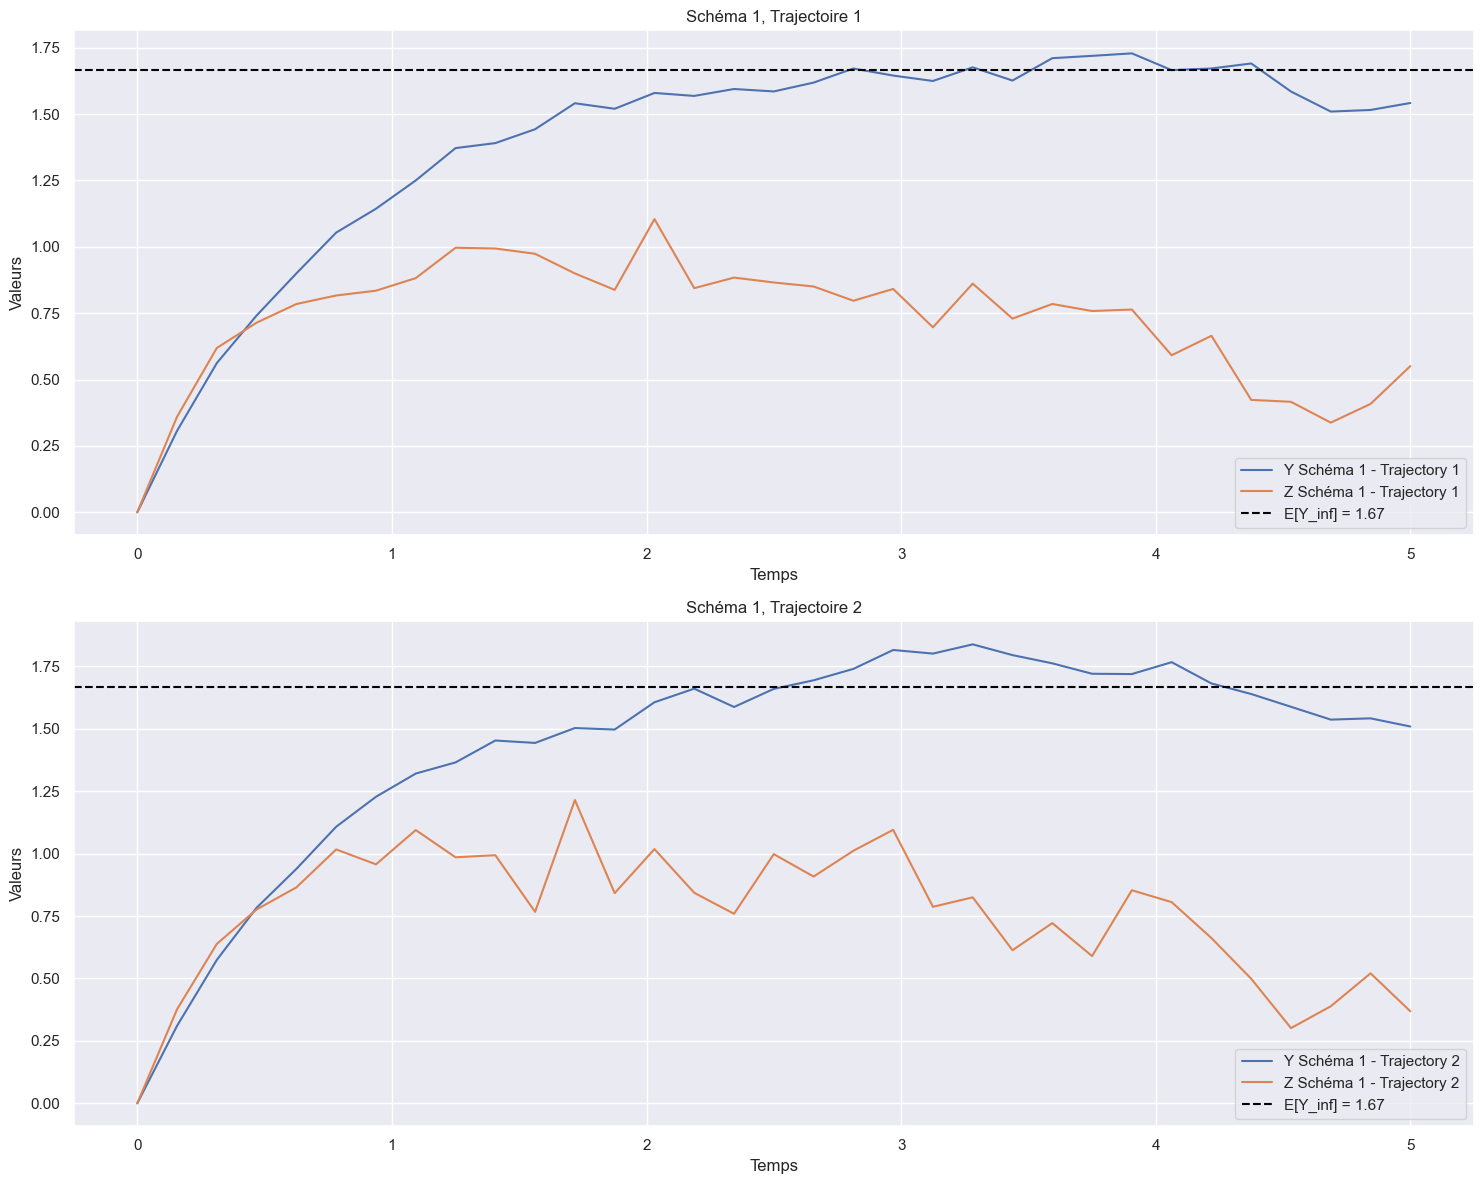

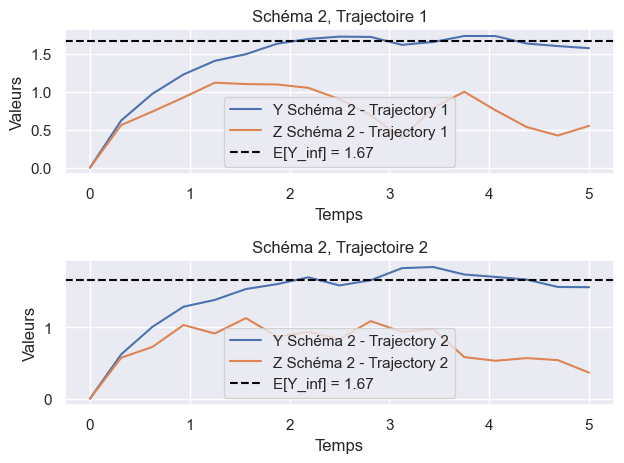

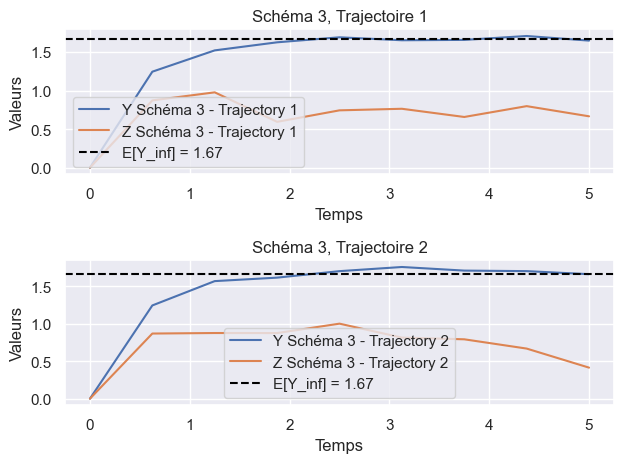

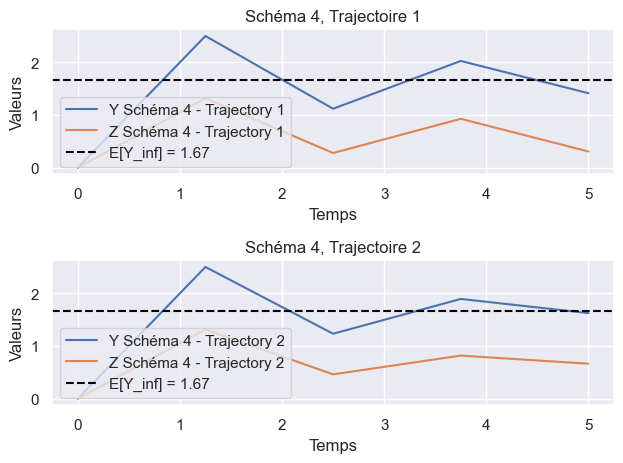

In [18]:
# Paramètres globaux pour la simulation
T = 5            # Maturité / Temps d'arrêt de la simulation
size_sample = 2  # Nombre de trajectoires à générer

H = 0.1  # Paramètre de Hurst

# Paramètres de la fonction sigma
a = 0.384
b = 0.095
c = 0.0025

# Première simulation
eta = 0.1

# Paramètres de la fonction b
mu = 2
lamb = 1.2

# Processus markovien poisson rouge Y
xi0 = 0

# Paramètres spécifiques à la simulation multi-échelle
r = 2   # Base du pas de temps, N_min = 2^r
m = 3   # Nombre de schémas à simuler, on aura donc N_max = 2^{r+m}

# Simulation des 4 schémas avec la fonction simulate_models_2N
deb = time.time()
results = simulate_models_2N(eta, mu, lamb, a, b, c, H, T, xi0, r, m, size_sample)
fin = time.time()
print(f"Temps = {fin - deb} s")

# Récupération des grilles temporelles pour chaque schéma
time_grids = [np.linspace(0, T, 2**(r + m - i) + 1) for i in range(m + 1)]

# Affichage des résultats pour chaque schéma
plt.figure(figsize=(15, 6 * size_sample))

for i in range(m + 1):
    Y, Z = results[i]  # Récupérer Y et Z pour le schéma i
    times = time_grids[i]  # Grille temporelle associée à ce schéma
    
    for j in range(size_sample):
        plt.subplot(size_sample, 1, j + 1)
        plt.plot(times, Y[:, j], label=f"Y Schéma {i+1} - Trajectory {j+1}")
        plt.plot(times, Z[:, j], label=f"Z Schéma {i+1} - Trajectory {j+1}")
        plt.axhline(y=mu/lamb, color="black", linestyle="--", label=f"E[Y_inf] = {mu/lamb:.2f}")
        plt.title(f"Schéma {i+1}, Trajectoire {j+1}")
        plt.xlabel("Temps")
        plt.ylabel("Valeurs")
        plt.legend()

    plt.tight_layout()
    plt.show()

## Visualisation de l'ordre de convergence fort du processus éléphant

In [29]:
def compute_errors_2N(eta, mu, lamb, a, b, c, H, T, xi0, r, m, size_sample):
    """
    Simule les trajectoires d'un actif financier selon le modèle présenté dans l'article. 
    Ce modèle est particulier dans le sens où la volatilité de l'actif possède un effet de mémoire. 

    :param eta: Float
        Facteur d'échelle pour lisser la volatilité des processus "poisson rouge" et "éléphant".

    :param mu: Float
        Taux de rendement moyen attendu de l'actif.

    :param lamb: Float
        Taux de retour à la moyenne pour le modèle de "poisson rouge".

    :param a: Float
        Coefficient de l'échelle de la variance dans le modèle de l'actif.

    :param b: Float
        Point moyen autour duquel la variance fluctue.

    :param c: Float
        Terme constant ajouté à la variance. Seuil minimal / Variance "planchée"

    :param H: Float
        Paramètre de Hurst, contrôlant le degré de mémoire du processus "éléphant".

    :param T: Float
        Durée totale de la période de simulation, en années.

    :param xi0: Float
        Condition initiale pour le processus "éléphant".

    :param r: Int
        Exposant de base pour le pas de temps : N_min=2^r.    
    
    :param m: Int
        Nombre d'exposants additionnels : N_max=2^{r+m}.

    :param size_sample: Int
        Nombre de trajectoires indépendantes à simuler.

    :return: List
        Renvoie la liste du sup des erreurs en norme L2 pour chaque paire de schémas de pas (2N, N).
    """
    # Simulation des schémas
    results = simulate_models_2N(eta, mu, lamb, a, b, c, H, T, xi0, r, m, size_sample)

    # Calcul des erreurs par paires de trajectoires
    errors = []
    for i in range(len(results) - 1):
        print(len(results[i][1][::2]) == len(results[i+1][1]))
        err = np.mean(np.max((results[i][1][::2] - results[i+1][1])**2, axis=0))
        errors.append(err)

    return errors
    

Construction des matrices G:   0%|          | 0/100 [00:00<?, ?it/s]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 0
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 0
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 0
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 0
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 0
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propre de 

Construction des matrices G:   1%|          | 1/100 [00:01<02:51,  1.73s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 0
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 0
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 0
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 0
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 0
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre pro

Construction des matrices G:   2%|▏         | 2/100 [00:03<02:49,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 1
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 1
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 1
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 1
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 1
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 1
9.99999997

Construction des matrices G:   3%|▎         | 3/100 [00:05<02:48,  1.73s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 2
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 2
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 2
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 2
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 2
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre pro

Construction des matrices G:   4%|▍         | 4/100 [00:06<02:46,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 3
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 3
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 3
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 3
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 3
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 3
9.99999997

Construction des matrices G:   5%|▌         | 5/100 [00:08<02:44,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 4
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 4
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 4
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 4
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 4
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 4
1.0000000

Construction des matrices G:   6%|▌         | 6/100 [00:10<02:43,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 5
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 5
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 5
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 5
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 5
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajectory 5


Construction des matrices G:   7%|▋         | 7/100 [00:12<02:41,  1.74s/it]

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 6
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 6
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 6
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 6
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 6
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_p

Construction des matrices G:   8%|▊         | 8/100 [00:13<02:39,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 7
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 7
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 7
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 7
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 7
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajectory 7


Construction des matrices G:   9%|▉         | 9/100 [00:15<02:37,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 8
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 8
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 8
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 8
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 8
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 8
1.0000000

Construction des matrices G:  10%|█         | 10/100 [00:17<02:36,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 9
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 9
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 9
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 9
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 9
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 9
1.0000000

Construction des matrices G:  11%|█         | 11/100 [00:19<02:34,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 10
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 10
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 10
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 10
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 10
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  12%|█▏        | 12/100 [00:20<02:32,  1.73s/it]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 12
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 12
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 12
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 12
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 12
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propr

Construction des matrices G:  13%|█▎        | 13/100 [00:22<02:30,  1.74s/it]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 13
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 13
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 13
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 13
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 13
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propr

Construction des matrices G:  14%|█▍        | 14/100 [00:24<02:29,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 13
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 13
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 13
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 13
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 13
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 13
1.0

Construction des matrices G:  15%|█▌        | 15/100 [00:26<02:27,  1.74s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 14
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 14
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 14
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 14
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 14
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  16%|█▌        | 16/100 [00:27<02:25,  1.74s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 15
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 15
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 15
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 15
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 15
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  17%|█▋        | 17/100 [00:29<02:24,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 16
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 16
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 16
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 16
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 16
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 16
1.0

Construction des matrices G:  18%|█▊        | 18/100 [00:31<02:22,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 17
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 17
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 17
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 17
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 17
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 17
1.0000000

Construction des matrices G:  19%|█▉        | 19/100 [00:32<02:20,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 18
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 18
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 18
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 18
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 18
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 18
9.99

Construction des matrices G:  20%|██        | 20/100 [00:34<02:18,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 19
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 19
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 19
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 19
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 19
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 19
1.0000000

Construction des matrices G:  21%|██        | 21/100 [00:36<02:17,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 23, trajectory 20
3.2095023653620034e-17

Conditionnement de la matrice A_pos : 489051318.2366275
Plus petite valeur propre propre de A_pos pour controler :
time step 23, trajectory 20
9.999999946671851e-09
Norme Frobenius A - A_pos : 2.3921418000900314e-08

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 20
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 20
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 20
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory

Construction des matrices G:  22%|██▏       | 22/100 [00:38<02:15,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 21
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 21
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 21
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 21
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 21
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 21
9.99

Construction des matrices G:  23%|██▎       | 23/100 [00:39<02:13,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 22
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 22
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 22
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 22
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 22
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 22
1.0000000

Construction des matrices G:  24%|██▍       | 24/100 [00:41<02:11,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 23
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 23
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 23
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 23
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 23
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 23
1.0

Construction des matrices G:  25%|██▌       | 25/100 [00:43<02:10,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 24
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 24
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 24
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 24
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 24
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  26%|██▌       | 26/100 [00:45<02:08,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 25
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 25
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 25
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 25
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 25
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 25
9.99

Construction des matrices G:  27%|██▋       | 27/100 [00:46<02:07,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 26
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 26
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 26
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 26
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 26
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 26
1.0000000

Construction des matrices G:  28%|██▊       | 28/100 [00:48<02:05,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 27
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 27
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 27
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 27
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 27
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 27
1.0000000

Construction des matrices G:  29%|██▉       | 29/100 [00:50<02:03,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 28
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 28
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 28
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 28
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 28
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 28
9.99

Construction des matrices G:  30%|███       | 30/100 [00:52<02:02,  1.74s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 29
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 29
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 29
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 29
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 29
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  31%|███       | 31/100 [00:53<02:00,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 30
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 30
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 30
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 30
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 30
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 30
9.99

Construction des matrices G:  32%|███▏      | 32/100 [00:55<01:58,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 31
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 31
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 31
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 31
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 31
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 31
1.0000000

Construction des matrices G:  33%|███▎      | 33/100 [00:57<01:56,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 32
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 32
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 32
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 32
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 32
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 32
1.0

Construction des matrices G:  34%|███▍      | 34/100 [00:59<01:54,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 33
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 33
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 33
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 33
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 33
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 33
9.99

Construction des matrices G:  35%|███▌      | 35/100 [01:00<01:52,  1.74s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 34
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 34
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 34
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 34
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 34
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  36%|███▌      | 36/100 [01:02<01:51,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 35
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 35
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 35
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 35
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 35
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 35
1.0

Construction des matrices G:  37%|███▋      | 37/100 [01:04<01:49,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 36
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 36
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 36
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 36
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 36
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 36
1.0

Construction des matrices G:  38%|███▊      | 38/100 [01:06<01:47,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 37
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 37
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 37
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 37
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 37
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  39%|███▉      | 39/100 [01:07<01:45,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 38
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 38
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 38
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 38
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 38
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  40%|████      | 40/100 [01:09<01:44,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 39
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 39
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 39
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 39
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 39
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 39
9.99

Construction des matrices G:  41%|████      | 41/100 [01:11<01:42,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 40
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 40
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 40
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 40
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 40
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 40
9.99999

Construction des matrices G:  42%|████▏     | 42/100 [01:12<01:40,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 41
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 41
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 41
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 41
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 41
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  43%|████▎     | 43/100 [01:14<01:38,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 42
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 42
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 42
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 42
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 42
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 42
1.0000000

Construction des matrices G:  44%|████▍     | 44/100 [01:16<01:36,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 43
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 43
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 43
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 43
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 43
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 43
9.99

Construction des matrices G:  45%|████▌     | 45/100 [01:18<01:35,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 44
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 44
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 44
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 44
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 44
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 44
9.99

Construction des matrices G:  46%|████▌     | 46/100 [01:19<01:33,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 45
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 45
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 45
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 45
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 45
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 45
1.0000000

Construction des matrices G:  47%|████▋     | 47/100 [01:21<01:31,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 46
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 46
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 46
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 46
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 46
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  48%|████▊     | 48/100 [01:23<01:30,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 47
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 47
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 47
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 47
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 47
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 47
9.99

Construction des matrices G:  49%|████▉     | 49/100 [01:25<01:28,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 48
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 48
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 48
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 48
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 48
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 48
9.99

Construction des matrices G:  50%|█████     | 50/100 [01:26<01:26,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 49
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 49
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 49
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 49
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 49
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 49
1.0

Construction des matrices G:  51%|█████     | 51/100 [01:28<01:24,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 50
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 50
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 50
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 50
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 50
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  52%|█████▏    | 52/100 [01:30<01:23,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 51
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 51
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 51
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 51
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 51
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 51
1.0000000

Construction des matrices G:  53%|█████▎    | 53/100 [01:32<01:21,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 52
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 52
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 52
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 52
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 52
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 52
1.0

Construction des matrices G:  54%|█████▍    | 54/100 [01:33<01:19,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 53
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 53
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 53
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 53
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 53
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  55%|█████▌    | 55/100 [01:35<01:17,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 54
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 54
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 54
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 54
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 54
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  56%|█████▌    | 56/100 [01:37<01:16,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 55
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 55
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 55
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 55
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 55
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 55
9.99

Construction des matrices G:  57%|█████▋    | 57/100 [01:38<01:14,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 56
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 56
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 56
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 56
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 56
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 56
1.0

Construction des matrices G:  58%|█████▊    | 58/100 [01:40<01:12,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 57
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 57
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 57
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 57
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 57
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 57
9.99

Construction des matrices G:  59%|█████▉    | 59/100 [01:42<01:10,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 58
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 58
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 58
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 58
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 58
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  60%|██████    | 60/100 [01:44<01:09,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 59
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 59
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 59
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 59
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 59
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 59
1.0

Construction des matrices G:  61%|██████    | 61/100 [01:45<01:07,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 60
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 60
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 60
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 60
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 60
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 60
1.0000000

Construction des matrices G:  62%|██████▏   | 62/100 [01:47<01:05,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 61
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 61
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 61
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 61
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 61
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre propre de A_pos pour controler :
time step 22, trajectory

Construction des matrices G:  63%|██████▎   | 63/100 [01:49<01:04,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 62
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 62
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 62
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 62
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 62
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 62
1.0000000

Construction des matrices G:  64%|██████▍   | 64/100 [01:51<01:02,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 63
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 63
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 63
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 63
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 63
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 63
1.0

Construction des matrices G:  65%|██████▌   | 65/100 [01:52<01:00,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 64
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 64
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 64
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 64
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 64
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 64
1.0

Construction des matrices G:  66%|██████▌   | 66/100 [01:54<00:58,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 65
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 65
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 65
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 65
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 65
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 65
9.99

Construction des matrices G:  67%|██████▋   | 67/100 [01:56<00:57,  1.73s/it]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 67
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 67
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 67
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 67
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 67
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propr

Construction des matrices G:  68%|██████▊   | 68/100 [01:58<00:55,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 67
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 67
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 67
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 67
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 67
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  69%|██████▉   | 69/100 [01:59<00:53,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 68
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 68
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 68
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 68
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 68
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 68
9.99

Construction des matrices G:  70%|███████   | 70/100 [02:01<00:52,  1.73s/it]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 70
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 70
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 70
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 70
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 70
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propr

Construction des matrices G:  71%|███████   | 71/100 [02:03<00:50,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 70
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 70
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 70
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 70
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 70
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 70
9.99

Construction des matrices G:  72%|███████▏  | 72/100 [02:04<00:48,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 71
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 71
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 71
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 71
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 71
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 71
1.0

Construction des matrices G:  73%|███████▎  | 73/100 [02:06<00:46,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 23, trajectory 72
3.2095023653620034e-17

Conditionnement de la matrice A_pos : 489051318.2366275
Plus petite valeur propre propre de A_pos pour controler :
time step 23, trajectory 72
9.999999946671851e-09
Norme Frobenius A - A_pos : 2.3921418000900314e-08

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 72
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 72
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 72
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory

Construction des matrices G:  74%|███████▍  | 74/100 [02:08<00:44,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 73
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 73
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 73
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 73
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 73
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 73
1.0

Construction des matrices G:  75%|███████▌  | 75/100 [02:10<00:43,  1.73s/it]

Conditionnement de la matrice A : 1.234619228437195e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 75
-0.48699760309887863

Conditionnement de la matrice A_pos : 1485317501.7526846
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 75
9.999997731707464e-09
Norme Frobenius A - A_pos : 0.48699776963077895

Conditionnement de la matrice A : 4.283902246794747e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 75
-5.629544417277604e-16

Conditionnement de la matrice A_pos : 614660603.4730859
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 75
9.999999893171037e-09
Norme Frobenius A - A_pos : 5.2618377440683713e-08

Conditionnement de la matrice A : 1.1696873977049183e+18
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 75
-0.06046696632192724

Conditionnement de la matrice A_pos : 942544197.9457062
Plus petite valeur propre propr

Construction des matrices G:  76%|███████▌  | 76/100 [02:11<00:41,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 75
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 75
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 75
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 75
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 75
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 75
9.99999

Construction des matrices G:  77%|███████▋  | 77/100 [02:13<00:39,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 76
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 76
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 76
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 76
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 76
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 76
1.0

Construction des matrices G:  78%|███████▊  | 78/100 [02:15<00:38,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 77
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 77
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 77
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 77
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 77
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  79%|███████▉  | 79/100 [02:17<00:36,  1.73s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 78
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 78
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 78
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 78
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 78
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Construction des matrices G:  80%|████████  | 80/100 [02:18<00:34,  1.73s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 79
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 79
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 79
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 79
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 79
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  81%|████████  | 81/100 [02:20<00:33,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 80
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 80
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 80
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 80
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 80
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 80
9.99

Construction des matrices G:  82%|████████▏ | 82/100 [02:22<00:31,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 81
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 81
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 81
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 81
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 81
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 81
1.0000000

Construction des matrices G:  83%|████████▎ | 83/100 [02:24<00:29,  1.75s/it]

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 82
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 82
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 82
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 82
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 82
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre d

Construction des matrices G:  84%|████████▍ | 84/100 [02:25<00:28,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 83
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajectory 83
9.999999956282752e-09
Norme Frobenius A - A_pos : 3.116847191440469e-08

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 83
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 83
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 83
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, traject

Construction des matrices G:  85%|████████▌ | 85/100 [02:27<00:27,  1.81s/it]

Plus petite valeur propre propre de A pour controler :
time step 23, trajectory 84
3.2095023653620034e-17

Conditionnement de la matrice A_pos : 489051318.2366275
Plus petite valeur propre propre de A_pos pour controler :
time step 23, trajectory 84
9.999999946671851e-09
Norme Frobenius A - A_pos : 2.3921418000900314e-08

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 84
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 84
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 84
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory

Construction des matrices G:  86%|████████▌ | 86/100 [02:29<00:25,  1.85s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 85
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 85
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 85
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 85
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 85
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 85
1.0

Construction des matrices G:  87%|████████▋ | 87/100 [02:31<00:23,  1.84s/it]

Conditionnement de la matrice A : 1.4710656965485187e+17
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 86
-0.375447248712295

Conditionnement de la matrice A_pos : 1079002130.0813231
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 86
9.999999867827062e-09
Norme Frobenius A - A_pos : 0.37544726329496986

Conditionnement de la matrice A : 7.330104755231315e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 86
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 86
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 86
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre d

Construction des matrices G:  88%|████████▊ | 88/100 [02:33<00:21,  1.82s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 87
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 87
1.0000000070193898e-08
Norme Frobenius A - A_pos : 0.13884456243943574

Conditionnement de la matrice A : 3937562.8588401983
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 87
1.041475297677604e-06

Conditionnement de la matrice A_pos : 3937562.858714659
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 87
1.0414752976445912e-06
Norme Frobenius A - A_pos : 2.045832582383598e-15

Conditionnement de la matrice A : 202.2264714358642
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 87
-0.026472504884333448

Conditionnement de la matrice A_pos : 535344125.5911202
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 87
1.0

Construction des matrices G:  89%|████████▉ | 89/100 [02:35<00:19,  1.80s/it]

Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 88
7.042951888628099e-17

Conditionnement de la matrice A_pos : 468569165.9314002
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 88
9.999999960903505e-09
Norme Frobenius A - A_pos : 1.9369009510304375e-08

Conditionnement de la matrice A : 1345481802867415.0
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 88
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 88
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 88
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 88
9.99999

Construction des matrices G:  90%|█████████ | 90/100 [02:36<00:18,  1.81s/it]

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 89
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 89
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 89
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 89
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 89
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre 

Construction des matrices G:  91%|█████████ | 91/100 [02:38<00:16,  1.80s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 90
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 90
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 90
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 90
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 90
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G:  92%|█████████▏| 92/100 [02:40<00:14,  1.78s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 91
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 91
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 91
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 91
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 91
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 91
1.0000000

Construction des matrices G:  93%|█████████▎| 93/100 [02:42<00:12,  1.78s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 92
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 92
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 92
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 92
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 92
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 92
1.0000000

Construction des matrices G:  94%|█████████▍| 94/100 [02:44<00:12,  2.03s/it]

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 93
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 93
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 93
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 93
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 93
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre 

Construction des matrices G:  95%|█████████▌| 95/100 [02:46<00:09,  1.99s/it]

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 94
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 94
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 94
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 94
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 94
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre 

Construction des matrices G:  96%|█████████▌| 96/100 [02:48<00:07,  1.93s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 95
-0.05616462818045227

Conditionnement de la matrice A_pos : 663263991.71048
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 95
9.9999999753397e-09
Norme Frobenius A - A_pos : 0.056164638180453974

Conditionnement de la matrice A : 51747614881654.805
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 95
8.57141665792064e-14

Conditionnement de la matrice A_pos : 443490433.8848195
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 95
9.999999945905632e-09
Norme Frobenius A - A_pos : 1.3566441603234472e-08

Conditionnement de la matrice A : 93207285.90697238
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 95
-0.13884455243943575

Conditionnement de la matrice A_pos : 767853197.8944433
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 95
1.0000000

Construction des matrices G:  97%|█████████▋| 97/100 [02:50<00:05,  1.91s/it]

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 96
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 96
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 96
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 96
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 96
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre 

Construction des matrices G:  98%|█████████▊| 98/100 [02:52<00:03,  1.88s/it]

Conditionnement de la matrice A : 3.5111055215644544e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 97
-0.19456776179101642

Conditionnement de la matrice A_pos : 980620724.0459465
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 97
9.999999838919761e-09
Norme Frobenius A - A_pos : 0.1945677935176628

Conditionnement de la matrice A : 1.791493903751388e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 97
-1.1141955755459016e-16

Conditionnement de la matrice A_pos : 506546689.9423685
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 97
9.999999944578653e-09
Norme Frobenius A - A_pos : 2.7776774684706553e-08

Conditionnement de la matrice A : 3.9671257331878195e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 97
-0.05842084409250682

Conditionnement de la matrice A_pos : 738983092.8535737
Plus petite valeur propre 

Construction des matrices G:  99%|█████████▉| 99/100 [02:53<00:01,  1.84s/it]

Conditionnement de la matrice A : 2.7246254128562445e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 98
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 98
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 98
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 98
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 98
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propr

Construction des matrices G: 100%|██████████| 100/100 [02:55<00:00,  1.81s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 99
-2.470655314221822e-16

Conditionnement de la matrice A_pos : 535687207.8021821
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 99
9.999999945123699e-09
Norme Frobenius A - A_pos : 3.42265546628676e-08

Conditionnement de la matrice A : 5.6703199314997114e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 99
-0.05929777495483824

Conditionnement de la matrice A_pos : 795170322.631957
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 99
9.999999785306809e-09
Norme Frobenius A - A_pos : 0.05929778495484911

Conditionnement de la matrice A : 1.2710123549105194e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 99
-2.0239218892817264e-16

Conditionnement de la matrice A_pos : 521917702.39768815
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajecto

Simulation des trajectoires: 100%|██████████| 100/100 [00:00<00:00, 183.82it/s]


True
True
True
3
[0.29656068100057, 0.16500382424588314, 0.13288288481185181]
4
[ 4  8 16 32]


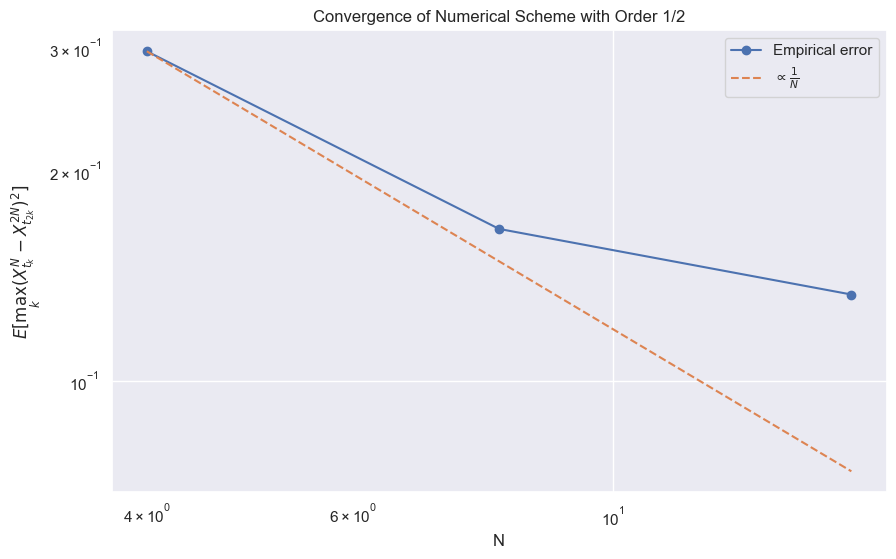

In [20]:
size_sample = 100

# Première simulation
eta = 0.1

# Paramètres de la fonction b
mu = 2
lamb = 1.2

# Processus markovien poisson rouge Y
xi0 = 0

# Paramètres spécifiques à la simulation multi-échelle
r = 2   # Base du pas de temps, N_min = 2^r
m = 3   # Nombre de schémas à simuler, on aura donc N_max = 2^{r+m}

# Calcul des erreurs
errors = compute_errors_2N(eta, mu, lamb, a, b, c, H, T, xi0, r, m, size_sample)
errors.reverse()

Ns = 2**np.array([i for i in range(r, r+m+1)])

print(len(errors))
print(errors)
print(len(Ns))
print(Ns)

plt.figure(figsize=(10, 6))
plt.loglog(Ns[:-1], errors, '-o', label='Empirical error')
plt.loglog(Ns[:-1], [errors[0] * (Ns[0] / N) for N in Ns[:-1]], '--', label=r'$\propto \frac{1}{N}$')
plt.xlabel('N')
plt.ylabel(r'$E[\max_{k} (X^{N}_{t_k} - X^{2N}_{t_{2k}})^2]$')
plt.legend()
plt.title('Convergence of Numerical Scheme with Order 1/2')
plt.grid(True)
plt.show()

Construction des matrices G:   0%|          | 0/100 [00:00<?, ?it/s]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 0
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 0
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 0
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 0
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 0
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre de A_

Construction des matrices G:   1%|          | 1/100 [00:01<02:54,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 0
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 0
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 0
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 0
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 0
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 0
9.999

Construction des matrices G:   2%|▏         | 2/100 [00:03<02:51,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 1
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 1
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 1
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 1
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 1
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 1
9.999

Construction des matrices G:   3%|▎         | 3/100 [00:05<02:50,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 2
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 2
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 2
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 2
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 2
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 2
9.999

Construction des matrices G:   4%|▍         | 4/100 [00:07<02:48,  1.76s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 3
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 3
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 3
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 3
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 3
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre prop

Construction des matrices G:   5%|▌         | 5/100 [00:08<02:47,  1.77s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 4
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 4
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 4
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 4
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 4
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de

Construction des matrices G:   6%|▌         | 6/100 [00:10<02:46,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 5
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 5
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 5
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 5
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 5
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 5
9.999999

Construction des matrices G:   7%|▋         | 7/100 [00:12<02:44,  1.77s/it]

Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 6
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 6
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 6
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 6
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 6
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour con

Construction des matrices G:   8%|▊         | 8/100 [00:14<02:42,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 7
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 7
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 7
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 7
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 7
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 7
9.999

Construction des matrices G:   9%|▉         | 9/100 [00:15<02:40,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 8
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 8
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 8
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 8
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 8
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 8
9.999

Construction des matrices G:  10%|█         | 10/100 [00:17<02:38,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 9
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 9
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 9
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 9
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 9
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 9
1.000000

Construction des matrices G:  11%|█         | 11/100 [00:19<02:37,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 10
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 10
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 10
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 10
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 10
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 10
9.

Construction des matrices G:  12%|█▏        | 12/100 [00:21<02:34,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 11
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 11
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 11
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 11
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 11
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  13%|█▎        | 13/100 [00:22<02:32,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 12
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 12
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 12
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 12
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 12
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 12
1.

Construction des matrices G:  14%|█▍        | 14/100 [00:24<02:31,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 13
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 13
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 13
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 13
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 13
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 13

Construction des matrices G:  15%|█▌        | 15/100 [00:26<02:30,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 14
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 14
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 14
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 14
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 14
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 14
9.

Construction des matrices G:  16%|█▌        | 16/100 [00:28<02:28,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 15
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 15
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 15
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 15
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 15
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  17%|█▋        | 17/100 [00:29<02:26,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 16
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 16
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 16
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 16
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 16
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  18%|█▊        | 18/100 [00:31<02:24,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 17
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 17
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 17
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 17
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 17
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  19%|█▉        | 19/100 [00:33<02:23,  1.77s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 18
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 18
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 18
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 18
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 18
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  20%|██        | 20/100 [00:35<02:20,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 19
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 19
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 19
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 19
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 19
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  21%|██        | 21/100 [00:37<02:19,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 20
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 20
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 20
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 20
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 20
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  22%|██▏       | 22/100 [00:38<02:17,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 21
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 21
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 21
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 21
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 21
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  23%|██▎       | 23/100 [00:40<02:15,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 22
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 22
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 22
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 22
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 22
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  24%|██▍       | 24/100 [00:42<02:14,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 23
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 23
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 23
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 23
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 23
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 23

Construction des matrices G:  25%|██▌       | 25/100 [00:44<02:12,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 24
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 24
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 24
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 24
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 24
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 24

Construction des matrices G:  26%|██▌       | 26/100 [00:45<02:11,  1.77s/it]

Conditionnement de la matrice A : 9.540842580289048e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 25
-0.04473477131512212

Conditionnement de la matrice A_pos : 662305679.1116976
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 25
9.999999823121311e-09
Norme Frobenius A - A_pos : 0.04473482966655836

Conditionnement de la matrice A : 1.5917313122915885e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 25
-7.839682472847481e-17

Conditionnement de la matrice A_pos : 360596738.96523786
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 25
9.999999954108152e-09
Norme Frobenius A - A_pos : 2.805719725592593e-08

Conditionnement de la matrice A : 2.2370699383845306e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 25
-0.01283010813566215

Conditionnement de la matrice A_pos : 514425934.37415713
Plus petite valeur propre

Construction des matrices G:  27%|██▋       | 27/100 [00:47<02:08,  1.77s/it]

Conditionnement de la matrice A : 9.540842580289048e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 26
-0.04473477131512212

Conditionnement de la matrice A_pos : 662305679.1116976
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 26
9.999999823121311e-09
Norme Frobenius A - A_pos : 0.04473482966655836

Conditionnement de la matrice A : 1.5917313122915885e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 26
-7.839682472847481e-17

Conditionnement de la matrice A_pos : 360596738.96523786
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 26
9.999999954108152e-09
Norme Frobenius A - A_pos : 2.805719725592593e-08

Conditionnement de la matrice A : 2.2370699383845306e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 26
-0.01283010813566215

Conditionnement de la matrice A_pos : 514425934.37415713
Plus petite valeur propre

Construction des matrices G:  28%|██▊       | 28/100 [00:49<02:06,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 27
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 27
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 27
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 27
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 27
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  29%|██▉       | 29/100 [00:51<02:05,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 28
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 28
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 28
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 28
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 28
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  30%|███       | 30/100 [00:52<02:03,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 29
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 29
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 29
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 29
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 29
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 29
1.

Construction des matrices G:  31%|███       | 31/100 [00:54<02:01,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 30
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 30
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 30
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 30
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 30
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 30

Construction des matrices G:  32%|███▏      | 32/100 [00:56<01:59,  1.76s/it]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 32
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 32
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 32
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 32
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 32
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre 

Construction des matrices G:  33%|███▎      | 33/100 [00:58<01:57,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 32
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 32
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 32
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 32
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 32
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  34%|███▍      | 34/100 [00:59<01:55,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 33
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 33
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 33
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 33
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 33
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 33
9.

Construction des matrices G:  35%|███▌      | 35/100 [01:01<01:53,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 34
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 34
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 34
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 34
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 34
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 34
1.

Construction des matrices G:  36%|███▌      | 36/100 [01:03<01:51,  1.75s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 35
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 35
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 35
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 35
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 35
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  37%|███▋      | 37/100 [01:05<01:49,  1.74s/it]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 37
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 37
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 37
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 37
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 37
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre 

Construction des matrices G:  38%|███▊      | 38/100 [01:06<01:47,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 37
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 37
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 37
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 37
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 37
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 37
1.

Construction des matrices G:  39%|███▉      | 39/100 [01:08<01:46,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 38
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 38
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 38
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 38
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 38
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 38
1.

Construction des matrices G:  40%|████      | 40/100 [01:10<01:44,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 39
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 39
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 39
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 39
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 39
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 39

Construction des matrices G:  41%|████      | 41/100 [01:12<01:42,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 40
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 40
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 40
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 40
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 40
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 40
1.

Construction des matrices G:  42%|████▏     | 42/100 [01:13<01:40,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 41
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 41
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 41
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 41
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 41
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  43%|████▎     | 43/100 [01:15<01:39,  1.74s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 42
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 42
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 42
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 42
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 42
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  44%|████▍     | 44/100 [01:17<01:37,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 43
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 43
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 43
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 43
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 43
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 43
9

Construction des matrices G:  45%|████▌     | 45/100 [01:19<01:35,  1.74s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 44
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 44
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 44
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 44
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 44
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  46%|████▌     | 46/100 [01:20<01:34,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 45
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 45
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 45
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 45
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 45
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  47%|████▋     | 47/100 [01:22<01:32,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 46
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 46
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 46
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 46
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 46
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 46
9.

Construction des matrices G:  48%|████▊     | 48/100 [01:24<01:30,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 47
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 47
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 47
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 47
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 47
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 47
1.

Construction des matrices G:  49%|████▉     | 49/100 [01:26<01:28,  1.74s/it]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 49
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 49
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 49
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 49
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 49
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre 

Construction des matrices G:  50%|█████     | 50/100 [01:27<01:26,  1.74s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 49
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 49
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 49
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 49
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 49
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  51%|█████     | 51/100 [01:29<01:25,  1.74s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 50
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 50
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 50
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 50
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 50
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  52%|█████▏    | 52/100 [01:31<01:23,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 51
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 51
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 51
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 51
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 51
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 51
1.

Construction des matrices G:  53%|█████▎    | 53/100 [01:32<01:21,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 52
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 52
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 52
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 52
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 52
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 52
9.

Construction des matrices G:  54%|█████▍    | 54/100 [01:34<01:20,  1.74s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 53
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 53
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 53
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 53
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 53
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  55%|█████▌    | 55/100 [01:36<01:18,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 54
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 54
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 54
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 54
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 54
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  56%|█████▌    | 56/100 [01:38<01:16,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 55
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 55
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 55
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 55
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 55
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  57%|█████▋    | 57/100 [01:39<01:14,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 56
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 56
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 56
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 56
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 56
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  58%|█████▊    | 58/100 [01:41<01:13,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 57
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 57
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 57
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 57
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 57
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 57
1.

Construction des matrices G:  59%|█████▉    | 59/100 [01:43<01:11,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 58
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 58
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 58
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 58
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 58
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 58
1.

Construction des matrices G:  60%|██████    | 60/100 [01:45<01:09,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 59
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 59
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 59
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 59
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 59
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 59

Construction des matrices G:  61%|██████    | 61/100 [01:46<01:08,  1.76s/it]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 61
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 61
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 61
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 61
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 61
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre 

Construction des matrices G:  62%|██████▏   | 62/100 [01:48<01:06,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 61
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 61
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 61
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 61
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 61
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 61

Construction des matrices G:  63%|██████▎   | 63/100 [01:50<01:05,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 62
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 62
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 62
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 62
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 62
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  64%|██████▍   | 64/100 [01:52<01:03,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 63
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 63
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 63
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 63
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 63
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  65%|██████▌   | 65/100 [01:54<01:01,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 64
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 64
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 64
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 64
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 64
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 64

Construction des matrices G:  66%|██████▌   | 66/100 [01:55<00:59,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 65
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 65
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 65
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 65
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 65
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  67%|██████▋   | 67/100 [01:57<00:58,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 66
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 66
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 66
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 66
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 66
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 66

Construction des matrices G:  68%|██████▊   | 68/100 [01:59<00:56,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 67
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 67
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 67
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 67
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 67
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 67

Construction des matrices G:  69%|██████▉   | 69/100 [02:01<00:54,  1.76s/it]

Conditionnement de la matrice A : 1.358418689522292e+18
Plus petite valeur propre propre de A pour controler :
time step 0, trajectory 69
-0.11318238572724662

Conditionnement de la matrice A_pos : 977938596.118614
Plus petite valeur propre propre de A_pos pour controler :
time step 0, trajectory 69
9.999998516803534e-09
Norme Frobenius A - A_pos : 0.11318272840923065

Conditionnement de la matrice A : 5.533018752445269e+17
Plus petite valeur propre propre de A pour controler :
time step 1, trajectory 69
-3.8183838143397095e-16

Conditionnement de la matrice A_pos : 438357510.9862798
Plus petite valeur propre propre de A_pos pour controler :
time step 1, trajectory 69
9.999999955814977e-09
Norme Frobenius A - A_pos : 5.272819002660877e-08

Conditionnement de la matrice A : 7.797030300123017e+17
Plus petite valeur propre propre de A pour controler :
time step 2, trajectory 69
-0.012904894250283799

Conditionnement de la matrice A_pos : 660885185.9965752
Plus petite valeur propre propre 

Construction des matrices G:  70%|███████   | 70/100 [02:02<00:52,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 69
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 69
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 69
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 69
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 69
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 69
9.

Construction des matrices G:  71%|███████   | 71/100 [02:04<00:50,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 70
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 70
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 70
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 70
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 70
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 70
9.

Construction des matrices G:  72%|███████▏  | 72/100 [02:06<00:48,  1.75s/it]

Conditionnement de la matrice A : 9.540842580289048e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 71
-0.04473477131512212

Conditionnement de la matrice A_pos : 662305679.1116976
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 71
9.999999823121311e-09
Norme Frobenius A - A_pos : 0.04473482966655836

Conditionnement de la matrice A : 1.5917313122915885e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 71
-7.839682472847481e-17

Conditionnement de la matrice A_pos : 360596738.96523786
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 71
9.999999954108152e-09
Norme Frobenius A - A_pos : 2.805719725592593e-08

Conditionnement de la matrice A : 2.2370699383845306e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 71
-0.01283010813566215

Conditionnement de la matrice A_pos : 514425934.37415713
Plus petite valeur propre

Construction des matrices G:  73%|███████▎  | 73/100 [02:08<00:47,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 72
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 72
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 72
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 72
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 72
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 72
9.

Construction des matrices G:  74%|███████▍  | 74/100 [02:09<00:45,  1.75s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 73
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 73
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 73
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 73
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 73
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  75%|███████▌  | 75/100 [02:11<00:43,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 74
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 74
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 74
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 74
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 74
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  76%|███████▌  | 76/100 [02:13<00:42,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 75
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 75
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 75
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 75
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 75
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 75
9.

Construction des matrices G:  77%|███████▋  | 77/100 [02:15<00:40,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 76
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 76
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 76
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 76
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 76
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 76

Construction des matrices G:  78%|███████▊  | 78/100 [02:16<00:38,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 77
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 77
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 77
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 77
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 77
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  79%|███████▉  | 79/100 [02:18<00:36,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 78
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 78
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 78
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 78
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 78
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 78

Construction des matrices G:  80%|████████  | 80/100 [02:20<00:34,  1.75s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 79
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 79
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 79
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 79
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 79
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  81%|████████  | 81/100 [02:22<00:33,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 80
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 80
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 80
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 80
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 80
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 80
1.

Construction des matrices G:  82%|████████▏ | 82/100 [02:23<00:31,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 81
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 81
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 81
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 81
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 81
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 81
9.

Construction des matrices G:  83%|████████▎ | 83/100 [02:25<00:29,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 82
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 82
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 82
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 82
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 82
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 82
1.

Construction des matrices G:  84%|████████▍ | 84/100 [02:27<00:27,  1.74s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 83
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 83
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 83
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 83
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 83
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  85%|████████▌ | 85/100 [02:29<00:26,  1.75s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 84
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 84
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 84
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 84
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 84
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 84
9.

Construction des matrices G:  86%|████████▌ | 86/100 [02:30<00:24,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 85
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 85
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 85
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 85
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 85
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 85
1.

Construction des matrices G:  87%|████████▋ | 87/100 [02:32<00:23,  1.77s/it]

Conditionnement de la matrice A : 9.540842580289048e+17
Plus petite valeur propre propre de A pour controler :
time step 20, trajectory 86
-0.04473477131512212

Conditionnement de la matrice A_pos : 662305679.1116976
Plus petite valeur propre propre de A_pos pour controler :
time step 20, trajectory 86
9.999999823121311e-09
Norme Frobenius A - A_pos : 0.04473482966655836

Conditionnement de la matrice A : 1.5917313122915885e+17
Plus petite valeur propre propre de A pour controler :
time step 21, trajectory 86
-7.839682472847481e-17

Conditionnement de la matrice A_pos : 360596738.96523786
Plus petite valeur propre propre de A_pos pour controler :
time step 21, trajectory 86
9.999999954108152e-09
Norme Frobenius A - A_pos : 2.805719725592593e-08

Conditionnement de la matrice A : 2.2370699383845306e+17
Plus petite valeur propre propre de A pour controler :
time step 22, trajectory 86
-0.01283010813566215

Conditionnement de la matrice A_pos : 514425934.37415713
Plus petite valeur propre

Construction des matrices G:  88%|████████▊ | 88/100 [02:34<00:21,  1.77s/it]

Conditionnement de la matrice A : 2.2549981587448502e+17
Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 87
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 87
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 87
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 87
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 87
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre

Construction des matrices G:  89%|████████▉ | 89/100 [02:36<00:19,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 88
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 88
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 88
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 88
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 88
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 88
9.

Construction des matrices G:  90%|█████████ | 90/100 [02:37<00:17,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 89
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 89
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 89
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 89
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 89
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  91%|█████████ | 91/100 [02:39<00:15,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 90
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 90
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 90
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 90
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 90
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 90
9.

Construction des matrices G:  92%|█████████▏| 92/100 [02:41<00:14,  1.77s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 91
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 91
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 91
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 91
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 91
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  93%|█████████▎| 93/100 [02:43<00:12,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 92
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 92
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 92
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 92
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 92
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 92

Construction des matrices G:  94%|█████████▍| 94/100 [02:44<00:10,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 93
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 93
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 93
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 93
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 93
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 93
9.

Construction des matrices G:  95%|█████████▌| 95/100 [02:46<00:08,  1.76s/it]

Conditionnement de la matrice A : 8.911672895190917e+16
Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 94
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 94
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 94
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 94
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 94
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre prop

Construction des matrices G:  96%|█████████▌| 96/100 [02:48<00:07,  1.77s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 95
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 95
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 95
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 95
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 95
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 95

Construction des matrices G:  97%|█████████▋| 97/100 [02:50<00:05,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 96
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 96
9.999999990018298e-09
Norme Frobenius A - A_pos : 0.012724957507736844

Conditionnement de la matrice A : 51098154218932.75
Plus petite valeur propre propre de A pour controler :
time step 27, trajectory 96
6.173431753689308e-14

Conditionnement de la matrice A_pos : 315469111.9178196
Plus petite valeur propre propre de A_pos pour controler :
time step 27, trajectory 96
9.999999990373504e-09
Norme Frobenius A - A_pos : 1.378990601570385e-08

Conditionnement de la matrice A : 85596801.71130982
Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 96
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 96
9.

Construction des matrices G:  98%|█████████▊| 98/100 [02:52<00:03,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 17, trajectory 97
-1.7803680837508647e-16

Conditionnement de la matrice A_pos : 381517698.40183
Plus petite valeur propre propre de A_pos pour controler :
time step 17, trajectory 97
9.999999961940983e-09
Norme Frobenius A - A_pos : 3.443997350452447e-08

Conditionnement de la matrice A : 4.07035058768604e+17
Plus petite valeur propre propre de A pour controler :
time step 18, trajectory 97
-0.012862006098875977

Conditionnement de la matrice A_pos : 554746463.9334033
Plus petite valeur propre propre de A_pos pour controler :
time step 18, trajectory 97
9.999999961996363e-09
Norme Frobenius A - A_pos : 0.012862016098926177

Conditionnement de la matrice A : 3.183722856728057e+17
Plus petite valeur propre propre de A pour controler :
time step 19, trajectory 97
-1.5655236609177099e-16

Conditionnement de la matrice A_pos : 371627793.0049931
Plus petite valeur propre propre de A_pos pour controler :
time step 19, trajector

Construction des matrices G:  99%|█████████▉| 99/100 [02:53<00:01,  1.76s/it]

Plus petite valeur propre propre de A pour controler :
time step 24, trajectory 98
-0.08979407652412418

Conditionnement de la matrice A_pos : 686830503.7539933
Plus petite valeur propre propre de A_pos pour controler :
time step 24, trajectory 98
9.999999524901726e-09
Norme Frobenius A - A_pos : 0.08979409641587587

Conditionnement de la matrice A : 5.442658374228734e+16
Plus petite valeur propre propre de A pour controler :
time step 25, trajectory 98
6.455198226149415e-17

Conditionnement de la matrice A_pos : 333390285.97442967
Plus petite valeur propre propre de A_pos pour controler :
time step 25, trajectory 98
9.99999996922403e-09
Norme Frobenius A - A_pos : 1.9684620893097317e-08

Conditionnement de la matrice A : 1293361385478575.5
Plus petite valeur propre propre de A pour controler :
time step 26, trajectory 98
-0.012724947507729014

Conditionnement de la matrice A_pos : 460298354.24944687
Plus petite valeur propre propre de A_pos pour controler :
time step 26, trajectory 98

Construction des matrices G: 100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


Plus petite valeur propre propre de A pour controler :
time step 28, trajectory 99
-0.032877292497575115

Conditionnement de la matrice A_pos : 511083517.35113484
Plus petite valeur propre propre de A_pos pour controler :
time step 28, trajectory 99
9.999999995832196e-09
Norme Frobenius A - A_pos : 0.032877302497575124

Conditionnement de la matrice A : 6149820.646985373
Plus petite valeur propre propre de A pour controler :
time step 29, trajectory 99
4.7426835363685986e-07

Conditionnement de la matrice A_pos : 6149820.647273697
Plus petite valeur propre propre de A_pos pour controler :
time step 29, trajectory 99
4.7426835361554396e-07
Norme Frobenius A - A_pos : 6.530767361089398e-16

Conditionnement de la matrice A : 572.5300332225913
Plus petite valeur propre propre de A pour controler :
time step 30, trajectory 99
-0.006458358941601577

Conditionnement de la matrice A_pos : 369760445.967745
Plus petite valeur propre propre de A_pos pour controler :
time step 30, trajectory 99
1.

Simulation des trajectoires: 100%|██████████| 100/100 [00:00<00:00, 176.06it/s]


True
True
True
3
[0.031387984484764056, 0.031049792576690213, 0.024450341019941826]
4
[ 4  8 16 32]


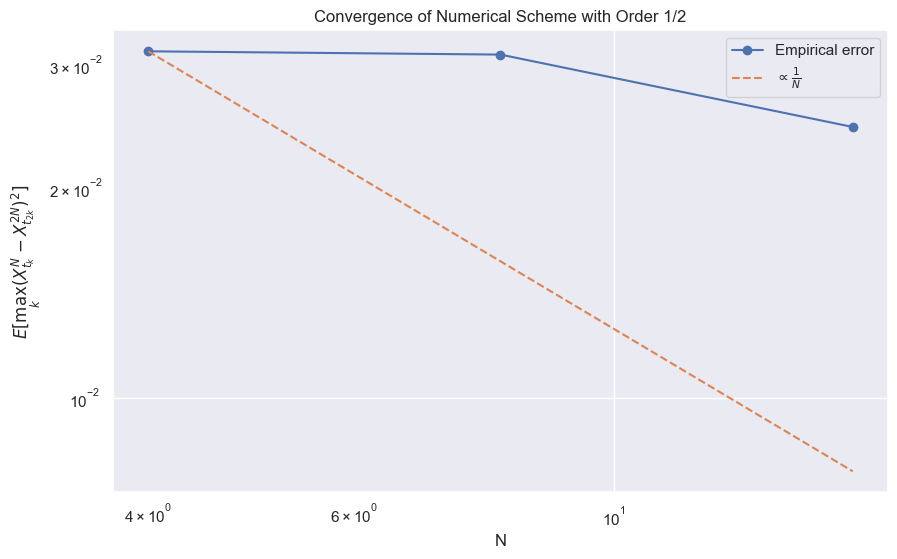

In [30]:
# Idée : La matrice se comporte mieux lorsqu'il y a peu de schémas donc essayer de simuler les schémas 2 par 2
size_sample = 100

# Première simulation
eta = 0.1

# Paramètres de la fonction b
mu = 2
lamb = 1.2

# Processus markovien poisson rouge Y
xi0 = 0

# Paramètres spécifiques à la simulation multi-échelle
r = 2   # Base du pas de temps, N_min = 2^r
m = 3   # Nombre de schémas à simuler, on aura donc N_max = 2^{r+m}

# Calcul des erreurs
errors = []
for i in range(r, m):
    errors += compute_errors_2N(eta, mu, lamb, a, b, c, H, T, xi0, i, i+1, size_sample)

Ns = 2**np.array([i for i in range(r, r+m+1)])

print(len(errors))
print(errors)
print(len(Ns))
print(Ns)

plt.figure(figsize=(10, 6))
plt.loglog(Ns[:-1], errors, '-o', label='Empirical error')
plt.loglog(Ns[:-1], [errors[0] * (Ns[0] / N) for N in Ns[:-1]], '--', label=r'$\propto \frac{1}{N}$')
plt.xlabel('N')
plt.ylabel(r'$E[\max_{k} (X^{N}_{t_k} - X^{2N}_{t_{2k}})^2]$')
plt.legend()
plt.title('Convergence of Numerical Scheme with Order 1/2')
plt.grid(True)
plt.show()

## Zone de test avec un schéma plus simple pour valider la méthode

Brownien géométrique classique : 
<center>$dX_t = \mu X_t dt + \sigma X_t dB_t$</center><br>
Et son schéma d'Euler discret :
<center>$\overline{X}_{t_{k+1}} = X_{t_k} + X_{t_k} \mu \frac{T}{N} + X_{t_k} \sigma \sqrt{\frac{T}{N}} G$</center><br>
Dont l'ordre pour la convergence forte est connu pour être de $\frac{1}{2}$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_eds(N, T, mu, sigma, x0, B):
    """
    Simulation d'un brownien géométrique via schéma d'Euler discret.
    """
    dt = T / N
    X = np.zeros(N + 1)
    X[0] = x0
    for k in range(1, N + 1):
        X[k] = X[k-1] + mu * X[k-1] * dt + sigma * X[k-1] * (B[k] - B[k-1])
    return X

def closed_form(T, N, mu, sigma, x0, B):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    return x0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)

def compute_errors_closed_form(T, N_vals, mu, sigma, x0, M):
    errors = []

    for N in N_vals:
        dt = T / N
        error_accum = 0.0
        for _ in range(M):
            # Simuler le même mouvement brownien pour les deux processus
            B = np.zeros(N+1)
            dB = np.random.normal(0, np.sqrt(dt), N)
            B[1:] = np.cumsum(dB)  # Incréments browniens cumulés
            
            # Simuler la solution exacte et la solution numérique avec le même brownien
            X_exact = closed_form(T, N, mu, sigma, x0, B)
            X_num = simulate_eds(N, T, mu, sigma, x0, B)
            
            # Calcul de l'erreur en norme L^2
            error_accum += np.max((X_num - X_exact)**2)
        
        # Erreur moyenne
        errors.append(error_accum / M)
        
    return errors

def compute_errors_2N(T, N_vals, mu, sigma, x0, M):
    errors = []

    # Génération des accroissements browniens pour la plus grande valeur de N
    N_max = N_vals[-1]
    dt_max = T / N_max
    
    for _ in range(M):
        # Génération d'un mouvement brownien pour N_max
        B_max = np.zeros(N_max + 1)
        dB_max = np.random.normal(0, np.sqrt(dt_max), N_max)
        B_max[1:] = np.cumsum(dB_max)

        # Liste des solutions pour différentes valeurs de N
        liste_trajs = []

        # Simulation pour chaque N dans N_vals
        for N in N_vals:
            # Si N est plus petit que N_max, on sous-échantillonne B_max
            step = N_max // N  # Facteur de sous-échantillonnage
            B = B_max[::step]  # Sauter des points dans le brownien pour correspondre à la discrétisation plus grossière
            
            # Simuler la solution numérique avec ce brownien
            X_num = simulate_eds(N, T, mu, sigma, x0, B)
            liste_trajs.append(X_num)
        
        # Calcul des erreurs par paire de trajectoires
        for i in range(len(N_vals) - 1):
            N = N_vals[i]
            traj_fine = liste_trajs[i + 1][::2]  # Trajectoire avec la discrétisation plus fine, sous-échantillonnée
            traj_coarse = liste_trajs[i]  # Trajectoire avec la discrétisation plus grossière

            # Calcul de l'erreur entre la trajectoire fine sous-échantillonnée et la trajectoire grossière
            error = np.max((traj_fine - traj_coarse) ** 2)
            errors.append(error)
    
    # Moyenne des erreurs sur toutes les trajectoires simulées
    return [np.mean(errors[i::(len(N_vals) - 1)]) for i in range(len(N_vals) - 1)]


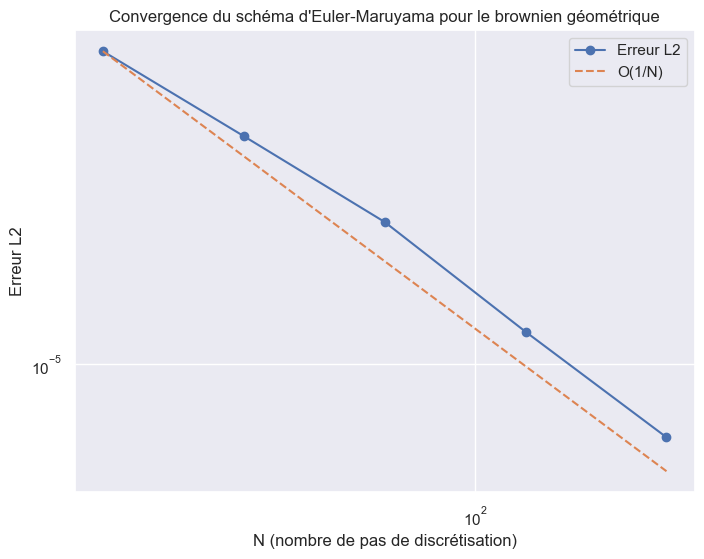

In [23]:
# Paramètres
x0 = 1.0
mu = 0.05
sigma_vol = 0.2
T = 1.0
M = 1000  # Nombre de trajectoires simulées

# Vecteur N pour différentes discrétisations
N_vals = [2**4, 2**5, 2**6, 2**7, 2**8]

errors = compute_errors_closed_form(T, N_vals, mu, sigma_vol, x0, M)

# Affichage des résultats
plt.figure(figsize=(8,6))
plt.loglog(N_vals, errors, label="Erreur L2", marker="o")
plt.loglog(N_vals, [errors[0] * (N_vals[0]/N) for N in N_vals], label="O(1/N)", linestyle="--")
plt.xlabel("N (nombre de pas de discrétisation)")
plt.ylabel("Erreur L2")
plt.legend()
plt.title("Convergence du schéma d'Euler-Maruyama pour le brownien géométrique")
plt.grid(True)
plt.show()

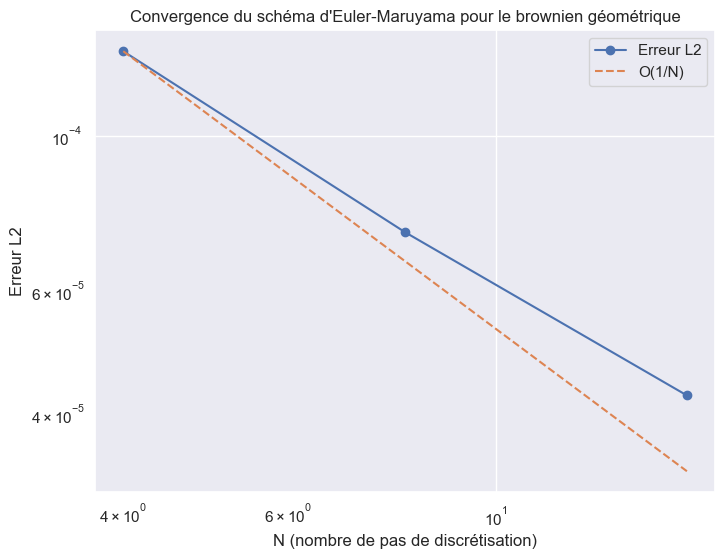

In [24]:
# Paramètres
x0 = 1.0
mu = 0.05
sigma_vol = 0.2
T = 1.0
M = 1000  # Nombre de trajectoires simulées

# Vecteur N pour différentes discrétisations
r_vals = np.array([2, 3, 4, 5])
N_vals = 2**r_vals

errors = compute_errors_2N(T, N_vals, mu, sigma_vol, x0, M)

# Affichage des résultats
plt.figure(figsize=(8,6))
plt.loglog(N_vals[:-1], errors, label="Erreur L2", marker="o")
plt.loglog(N_vals[:-1], [errors[0] * (N_vals[0]/N) for N in N_vals[:-1]], label="O(1/N)", linestyle="--")
plt.xlabel("N (nombre de pas de discrétisation)")
plt.ylabel("Erreur L2")
plt.legend()
plt.title("Convergence du schéma d'Euler-Maruyama pour le brownien géométrique")
plt.grid(True)
plt.show()